# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

**Заказчик этого исследования — сеть отелей «Как в гостях».**

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт
возможность забронировать номер без предоплаты. Однако если клиент
отменял бронирование, то компания терпела убытки. Сотрудники отеля
могли, например, закупить продукты к приезду гостя или просто не
успеть найти другого клиента.

Чтобы решить эту проблему, вам нужно разработать систему, которая
предсказывает отказ от брони. Если модель покажет, что бронь будет
отменена, то клиенту предлагается внести депозит. 

**Размер депозита** —
80% от стоимости номера за одни сутки и затрат на разовую уборку.
Деньги будут списаны со счёта клиента, если он всё же отменит бронь

**Бизнес-метрика и другие данные**

Основная бизнес-метрика для любой сети отелей — её прибыль.
Прибыль отеля — это разница между стоимостью номера за все ночи и
затраты на обслуживание: как при подготовке номера, так и при
проживании постояльца.

В отеле есть несколько типов номеров. В зависимости от типа номера
назначается стоимость за одну ночь. Есть также затраты на уборку. Если
клиент снял номер надолго, то убираются каждые два дня.

**Стоимость номеров отеля:**
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.

**В ценовой политике отеля используются сезонные коэффициенты:**
весной и осенью цены повышаются на 20%, летом — на 40%.

**Убытки отеля в случае отмены брони номера** — это стоимость одной
уборки и одной ночи с учётом сезонного коэффициента.

**На разработку системы прогнозирования заложен бюджет — 400 000.**
При этом необходимо учесть, что внедрение модели должно окупиться
за тестовый период. Затраты на разработку должны быть меньше той
выручки, которую система принесёт компании.

**Описание данных**

В таблицах `hotel_train` и `hotel_test` содержатся одинаковые столбцы:
- `id` — номер записи;
- `adults` — количество взрослых постояльцев;
- `arrival_date_year` — год заезда;
- `arrival_date_month` — месяц заезда;
- `arrival_date_week_number` — неделя заезда;
- `arrival_date_day_of_month` — день заезда;
- `babies` — количество младенцев;
- `booking_changes` — количество изменений параметров заказа;
- `children` — количество детей от 3 до 14 лет;
- `country` — гражданство постояльца;
- `customer_type` — тип заказчика:
     - `Contract` — договор с юридическим лицом;
     - `Group` — групповой заезд;
     - `Transient` — не связано с договором или групповым заездом;
     - `Transient`-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- `days_in_waiting_list` — сколько дней заказ ожидал подтверждения;
- `distribution_channel` — канал дистрибуции заказа;
- `is_canceled` — отмена заказа;
- `is_repeated_guest` — признак того, что гость бронирует номер второй раз;
- `lead_time` — количество дней между датой бронирования и датой прибытия;
- `meal` — опции заказа:
     - `SC` — нет дополнительных опций;
     - `BB` — включён завтрак;
     - `HB` — включён завтрак и обед;
     - `FB` — включён завтрак, обед и ужин.
- `previous_bookings_not_canceled` — количество подтверждённых заказов у клиента;
- `previous_cancellations` — количество отменённых заказов у клиента;
- `required_car_parking_spaces` — необходимость места для автомобиля;
- `reserved_room_type` — тип забронированной комнаты;
- `stays_in_weekend_nights` — количество ночей в выходные дни;
- `stays_in_week_nights` — количество ночей в будние дни;
- `total_nights` — общее количество ночей;
- `total_of_special_requests` — количество специальных отметок.

**Цель данной работы** - Построить модель, способную предсказать отказ клиента от брони, для уменьшения издержек Компании.

**Работа пройдет в следующие 5 этапов:**
1. Загрузка и подготовка данных;
2. Предобработка и исследовательский анализ данных;
3. Формулировка ML-задачи на основе бизнес-задачи;
4. Разработка модели ML;
5. Описание портрета "ненадежного" клиента.

## Библиотеки и функции

### Библиотеки

In [1]:
# Data tools
import pandas as pd
import re

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import OrdinalEncoder

# Data structure
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils import resample

# ML
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve, roc_curve

# Global settings
import os

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_rows', 100)
pd.options.display.max_colwidth = 75

sns.set_theme(style="whitegrid")

# Const
RANDOM_STATE = 42

### Функции

In [2]:
def create_general_analysis(df, asc=False):
    unique_values = []
    for i in df.columns:
        unique_values.append(df[i].sort_values(ascending=asc).unique())  # asc

    table_scan = pd.DataFrame(
        {
            'values_num': df.count(),
            'nan_values_num': df.isna().sum(),
            'occupancy': 100 - (df.isna().sum() / (df.isna().sum() + df.notna().sum()) * 100),
            'unique_values_num': df.nunique(),
            # 'min_value': df.min(),
            # 'max_value': df.max(),
            'unique_values': unique_values,
            'dtype': df.dtypes
        }
    )
    print('General data analysis:')
    print()
    print('Shape of the table:     ', df.shape)
    print(f'Duplicates in the table: {df.duplicated().sum()}, ({round(df.duplicated().sum() / df.shape[0], 4) * 100}%)')

    return table_scan


def data_visualization(ds, figsize=(12, 5), bins=50, show_target=True):
    try:
        for i in ds:
            if i == 'target' and show_target:
                print('-----------------------------------------------------------------------------------------------------')
                print(i)
                ds.target.value_counts(normalize=True).plot(kind='bar')

                plt.show()

                display(ds[i].describe())
            elif not pd.isna(re.search('^q.*', i)):
                print('-----------------------------------------------------------------------------------------------------')
                print(f'{i}: Количественный параметр')
                figure, (ax_box, ax_hist) = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},
                                                         figsize=figsize)
                sns.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)

                sns.boxplot(ds[i], ax=ax_box).set_title(f'{i}', y=1.5, fontsize=14)
                sns.histplot(ds[i], bins=bins, kde=True, ax=ax_hist)

                plt.show()

                display(ds[i].describe())
            elif not pd.isna(re.search('^c.*', i)) or not pd.isna(re.search('^b.*', i)):
                print('-----------------------------------------------------------------------------------------------------')
                print(f'{i}: Категориальный параметр')
                figure, (ax_count, ax_prev) = plt.subplots(1, 2, figsize=figsize)

                ds.pivot_table(index=f'{i}', values='target', aggfunc='count').plot(kind='bar', ax=ax_count,
                                                                                    title='feature_count')
                ds.pivot_table(index=f'{i}', values='target').plot(kind='bar', ax=ax_prev, color='orange',
                                                                   title='target_prevalence')

                plt.show()

                if ds[i].dtype == 'object':
                    display(ds[i].value_counts().reset_index().sort_values(by='index').set_index('index'))
                else:
                    display(ds[i].describe())
            else:
                pass

            print()
    except: # if ds is pd.Series with 'target' column
        print('-----------------------------------------------------------------------------------------------------')
        print('target')
        ds.value_counts(normalize=True).plot(kind='bar')

        plt.show()

        display(ds.describe())
        print()


def month_to_numbers(row):
    months = {
        'January':   1,
        'February':  2,
        'March':     3,
        'April':     4,
        'May':       5,
        'June':      6,
        'July':      7,
        'August':    8,
        'September': 9,
        'October':   10,
        'November':  11,
        'December':  12
    }

    return months[row]


def calculate_revenue(data, target, nights, room, month, prices, coeffs, cleaning, feature=False):
    if not feature:
        data = data[data[target] == 0]

    revenue = data[
        [nights, room, month]
    ].assign(
        profit=lambda x: (x[room].apply(lambda y: prices[y][0]) * x[nights] * x[month].apply(lambda a: coeffs[a])
                          ) - (
            (x[nights] + 1) // cleaning) * x[room].apply(lambda b: prices[b][1]) * x[month].apply(lambda a: coeffs[a])
     )

    if feature:
        revenue = revenue['profit']
    else:
        revenue = revenue['profit'].sum()

    return revenue


def calculate_costs(data, target, nights, room, month, prices, coeffs, cleaning, feature=False):
    if not feature:
        data = data[data[target] == 1]

    costs = data[
        [nights, room, month]
    ].assign(
        costs=lambda x: (x[room].apply(lambda y: prices[y][0]) * x[month].apply(lambda a: coeffs[a])
                         ) + x[room].apply(lambda b: prices[b][1])
    )

    if feature:
        costs = costs['costs']
    else:
        costs = costs['costs'].sum()

    return costs


def calculate_profit(data, target, nights, room, month, prices, coeffs, cleaning):
    profit = calculate_revenue(data, target, nights, room, month, prices, coeffs, cleaning) - calculate_costs(data, target, nights, room, month, prices, coeffs, cleaning)

    return profit


def create_sampling_res(X_train, X_val, X_test, train_data, test_data):
    print('Sampling results:')
    print(f'Training sample size:   {X_train.shape[0]}')
    print(f'Validation sample size: {X_val.shape[0]}')
    print(f'Test sample size:       {X_test.shape[0]}')
    print()
    print('Errors check:')
    print('The shape of the initial train data corresponds to the training and validation set:', train_data.shape[0] == X_train.shape[0] + X_val.shape[0])
    print('The shape of the initial test data corresponds to the test set:                    ', test_data.shape[0] == X_test.shape[0])


def create_metrics(model, X, y, only_result):
    predictions = model.predict(X)
    probabilities = model.predict_proba(X)[:, 1]

    results = pd.DataFrame(
        {
            'accuracy': [accuracy_score(y, predictions)],
            'precision': [precision_score(y, predictions)],
            'recall': [recall_score(y, predictions)],
            'f1': [f1_score(y, predictions)],
            'auc': [roc_auc_score(y, probabilities)],
        }
    ).T.reset_index().rename(columns={'index': 'metrics', 0: 'score'})

    if only_result:
        return results
    else:
        display(results)

        conf_matrix = pd.DataFrame(confusion_matrix(y, predictions))
        conf_matrix_norm = pd.DataFrame(confusion_matrix(y, predictions, normalize='true') * 100)

        print('Confusion Matrix')
        display(conf_matrix)
        print()
        # print('Confusion Matrix, %')
        # display(conf_matrix_norm)

        figure, (ax_roc, ax_f1, ax_matrix) = plt.subplots(1, 3, figsize=(21, 5))

        fpr, tpr, thresholds = roc_curve(y, probabilities)
        ax_roc.plot(fpr, tpr, lw=2, label='ROC curve ')
        ax_roc.plot([0, 1], [0, 1])
        ax_roc.set_xlim([-0.05, 1.0])
        ax_roc.set_ylim([0.0, 1.05])
        ax_roc.set_xlabel('False Positive Rate')
        ax_roc.set_ylabel('True Positive Rate')
        ax_roc.set_title('ROC curve')

        precision, recall, thresholds = precision_recall_curve(y, probabilities)

        ax_f1.step(recall, precision, where='post')
        ax_f1.set_xlabel('Recall')
        ax_f1.set_ylabel('Precision')
        ax_f1.set_xlim([-0.05, 1.0])
        ax_f1.set_ylim([0.0, 1.05])
        ax_f1.set_title('Precision-Recall')

        sns.heatmap(
            conf_matrix_norm,
            linewidths=3,
            linecolor='white',
            annot=True,
            cmap='Blues',
            ax=ax_matrix,
        )
        ax_matrix.set_title('Confusion Matrix')

        plt.show()


def upsample(features, target, repeat):

    features_zeros = features[target == 0]
    features_ones = features[target == 1]

    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=RANDOM_STATE)

    target_upsampled.hist()

    return features_upsampled, target_upsampled


def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]

    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=RANDOM_STATE)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=RANDOM_STATE)

    return features_downsampled, target_downsampled


def make_upsamle(ds, size, target):
    zeros = ds[ds['target'] == 0]
    ones = ds[ds['target'] == 1]

    if target:
        upsampled = resample(ones, random_state=RANDOM_STATE, n_samples=size, replace=True)
        df_upsampled = pd.concat([upsampled, zeros])
    else:
        upsampled = resample(zeros, random_state=RANDOM_STATE, n_samples=size, replace=True)
        df_upsampled = pd.concat([upsampled, ones])

    data_visualization(df_upsampled['target'])

    return df_upsampled

## 1. Загрузка и подготовка данных

Для достижения поставленной цели нам необходимо загрузить данные и сформировать из них датасет, определив параметры `features` и целевой признак `target`.

Для это последовательно выполним следующие шаги:
1. Загрузить данные и проведем их верхнеуровневый анализ;
2. Объединить обучающую и тестовую выборку в единый датафрейм и провести предварительную обработку данных;
3. Определить бизнес-константы.

### Загрузка и верхнеуровневый анализ данных

In [4]:
train_data_pth_1 = 'hotel_train.csv'
train_data_pth_2 = '/datasets/hotel_train.csv'

if os.path.exists(train_data_pth_1):
    train_data = pd.read_csv(train_data_pth_1)
elif os.path.exists(train_data_pth_2):
    train_data = pd.read_csv(train_data_pth_2)
else:
    print('Error!')
    

test_data_pth_1 = 'hotel_test.csv'
test_data_pth_2 = '/datasets/hotel_test.csv'

if os.path.exists(train_data_pth_1):
    test_data = pd.read_csv(test_data_pth_1)
elif os.path.exists(train_data_pth_2):
    test_data = pd.read_csv(test_data_pth_2)
else:
    print('Error!')

In [5]:
train_data.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3


In [6]:
create_general_analysis(train_data)

General data analysis:

Shape of the table:      (65229, 25)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
id,65229,0,100.0,65229,"[84121, 84117, 84094, 84063, 84057, 84056, 84050, 84023, 84022, 84016, ...",int64
is_canceled,65229,0,100.0,2,"[1, 0]",int64
lead_time,65229,0,100.0,369,"[374.0, 373.0, 372.0, 367.0, 365.0, 364.0, 363.0, 362.0, 361.0, 360.0, ...",float64
arrival_date_year,65229,0,100.0,2,"[2016, 2015]",int64
arrival_date_month,65229,0,100.0,12,"[September, October, November, May, March, June, July, January, Februar...",object
arrival_date_week_number,65229,0,100.0,53,"[53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36...",int64
arrival_date_day_of_month,65229,0,100.0,31,"[31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14...",int64
stays_in_weekend_nights,65229,0,100.0,5,"[4, 3, 2, 1, 0]",int64
stays_in_week_nights,65229,0,100.0,7,"[6, 5, 4, 3, 2, 1, 0]",int64
adults,65229,0,100.0,5,"[4.0, 3.0, 2.0, 1.0, 0.0]",float64


In [7]:
test_data.head()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7


In [8]:
create_general_analysis(test_data)

General data analysis:

Shape of the table:      (32412, 25)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
id,32412,0,100.0,32412,"[97903, 97902, 97901, 97900, 97899, 97898, 97897, 97896, 97895, 97894, ...",int64
is_canceled,32412,0,100.0,2,"[1, 0]",int64
lead_time,32412,0,100.0,368,"[373.0, 372.0, 368.0, 367.0, 366.0, 365.0, 364.0, 361.0, 359.0, 358.0, ...",float64
arrival_date_year,32412,0,100.0,1,[2017],int64
arrival_date_month,32412,0,100.0,8,"[May, March, June, July, January, February, August, April]",object
arrival_date_week_number,32412,0,100.0,35,"[35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18...",int64
arrival_date_day_of_month,32412,0,100.0,31,"[31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14...",int64
stays_in_weekend_nights,32412,0,100.0,5,"[4, 3, 2, 1, 0]",int64
stays_in_week_nights,32412,0,100.0,7,"[6, 5, 4, 3, 2, 1, 0]",int64
adults,32412,0,100.0,5,"[4.0, 3.0, 2.0, 1.0, 0.0]",float64


### Объединение данных в общий датафрейм и предварительная обработка данных

In [9]:
data = train_data.merge(test_data, how='outer')

create_general_analysis(data)

General data analysis:

Shape of the table:      (97641, 25)
Duplicates in the table: 0, (0.0%)


,values_num,nan_values_num,occupancy,unique_values_num,unique_values,dtype
id,97641,0,100.0,97641,"[97903, 97902, 97901, 97900, 97899, 97898, 97897, 97896, 97895, 97894, ...",int64
is_canceled,97641,0,100.0,2,"[1, 0]",int64
lead_time,97641,0,100.0,372,"[374.0, 373.0, 372.0, 368.0, 367.0, 366.0, 365.0, 364.0, 363.0, 362.0, ...",float64
arrival_date_year,97641,0,100.0,3,"[2017, 2016, 2015]",int64
arrival_date_month,97641,0,100.0,12,"[September, October, November, May, March, June, July, January, Februar...",object
arrival_date_week_number,97641,0,100.0,53,"[53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36...",int64
arrival_date_day_of_month,97641,0,100.0,31,"[31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14...",int64
stays_in_weekend_nights,97641,0,100.0,5,"[4, 3, 2, 1, 0]",int64
stays_in_week_nights,97641,0,100.0,7,"[6, 5, 4, 3, 2, 1, 0]",int64
adults,97641,0,100.0,5,"[4.0, 3.0, 2.0, 1.0, 0.0]",float64


Можно заметить, что в данных есть следующие особенности:
- названия столбцов не содержит описания сущности данных:
    - отсутствуют обозначения типов независимых признаков (`features`);
    - не выделен целевой, зависимый признак (`target`).
- в следующих столбцах необходимо изменить тип данных:
    - `id` на `char`;
    - `adults` на `int`;
    - `babies` на `int`;
    - `children` на `int`;
    - `lead_time` на `int`.
- в следующих столбцах необходимо провести преобразования:
    - `arrival_date_month` заменить название месяцев их числовым обозначением;
    - в столбцах `meal` и `reserved_room_type` необходимо избавиться от пробелов.
    
Обработаем данные моменты и переиминуем названия полей, сохранив их смысл и добавив к названию обозначения количественных ('q_') и категориальных ('c_') `features`, а также переиминуем целевой признак в '`target`'.

In [10]:
df = pd.DataFrame(
    {
        # id:
        'id':                      data['id'                            ].apply(str),

        # Potentially quantitative features:
        'q_adults':                data['adults'                        ].apply(int),
        'q_babies':                data['babies'                        ].apply(int),
        'q_children':              data['children'                      ].apply(int),
        'q_booking_changes':       data['booking_changes'               ],
        'q_days':                  data['days_in_waiting_list'          ],
        'q_lead_time':             data['lead_time'                     ].apply(int),
        'q_visits_num':            data['previous_bookings_not_canceled'],
        'q_canceled_num':          data['previous_cancellations'        ],
        'q_parking_num':           data['required_car_parking_spaces'   ],
        'q_weekend_nights':        data['stays_in_weekend_nights'       ],
        'q_week_nights':           data['stays_in_week_nights'          ],
        'q_total_nights':          data['total_nights'                  ],
        'q_requests':              data['total_of_special_requests'     ],

        # Potentially categorical features:
        'c_year':                  data['arrival_date_year'             ],
        'c_month':                 data['arrival_date_month'            ].apply(month_to_numbers),
        'c_week_num':              data['arrival_date_week_number'      ],
        'c_day':                   data['arrival_date_day_of_month'     ],
        'c_country':               data['country'                       ],
        'c_customer_type':         data['customer_type'                 ],
        'c_channel':               data['distribution_channel'          ],
        'c_regular_customer':      data['is_repeated_guest'             ],
        'c_meal':                  data['meal'                          ].apply(lambda x: re.sub(' ', '', x)),
        'c_room_class':            data['reserved_room_type'            ].apply(lambda x: re.sub(' ', '', x)),

        # Target:
        'target':                  data['is_canceled'                   ]
    }
)

q_features = []
for i in df.columns:
    if not pd.isna(re.search('^q.*', i)):
        q_features.append(i)

c_features = ['target']
for i in df.columns:
    if not pd.isna(re.search('^c.*', i)):
        c_features.append(i)

print('DF shape:', df.shape)
print('No columns and rows are missing:', df.shape == data.shape)
print()
df.head()

DF shape: (97641, 25)
No columns and rows are missing: True



,id,q_adults,q_babies,q_children,q_booking_changes,q_days,q_lead_time,q_visits_num,q_canceled_num,q_parking_num,q_weekend_nights,q_week_nights,q_total_nights,q_requests,c_year,c_month,c_week_num,c_day,c_country,c_customer_type,c_channel,c_regular_customer,c_meal,c_room_class,target
0,0,1,0,0,0,0,7,0,0,0,0,1,1,0,2015,7,27,1,GBR,Transient,Direct,0,BB,A,0
1,1,2,0,0,0,0,14,0,0,0,0,2,2,1,2015,7,27,1,GBR,Transient,TA/TO,0,BB,A,0
2,2,2,0,0,0,0,0,0,0,0,0,2,2,0,2015,7,27,1,PRT,Transient,Direct,0,BB,C,0
3,3,2,0,0,0,0,9,0,0,0,0,2,2,1,2015,7,27,1,PRT,Transient,Direct,0,FB,C,0
4,4,2,0,0,0,0,85,0,0,0,0,3,3,1,2015,7,27,1,PRT,Transient,TA/TO,0,BB,A,1


### Определение бизнес-констант

In [11]:
ROOMS_PRICES = {
    'A': [1000, 400],
    'B': [800, 350],
    'C': [600, 350],
    'D': [550, 150],
    'E': [500, 150],
    'F': [450, 150],
    'G': [350, 150]
}

CLEANING_FREQ = 2

SEASONAL_COEFFICIENTS = {
    1:  1.0,
    2:  1.0,
    3:  1.2,
    4:  1.2,
    5:  1.2,
    6:  1.4,
    7:  1.4,
    8:  1.4,
    9:  1.2,
    10: 1.2,
    11: 1.2,
    12: 1.0
}

BUDGET = 400_000

DEPOSIT = 0.8

PAYBACK_PERIOD = df.query('c_year == 2017')['c_month'].unique()

print('Business constants:')
print()
print('Rooms prices:         ', ROOMS_PRICES)
print('Cleaning frequency:   ', CLEANING_FREQ)
print('Seasonal coefficients:', SEASONAL_COEFFICIENTS)
print('Budget:               ', BUDGET)
print('Deposit:              ', DEPOSIT)
print('Payback period:       ', PAYBACK_PERIOD)

Business constants:

Rooms prices:          {'A': [1000, 400], 'B': [800, 350], 'C': [600, 350], 'D': [550, 150], 'E': [500, 150], 'F': [450, 150], 'G': [350, 150]}
Cleaning frequency:    2
Seasonal coefficients: {1: 1.0, 2: 1.0, 3: 1.2, 4: 1.2, 5: 1.2, 6: 1.4, 7: 1.4, 8: 1.4, 9: 1.2, 10: 1.2, 11: 1.2, 12: 1.0}
Budget:                400000
Deposit:               0.8
Payback period:        [1 2 3 4 5 6 7 8]


## 2. Исследовательский анализ данных и формирование датасета

Для формирования ML-модели необходимо сформировать датасет, который наиболее эффективным образом подойдет под решение задачи классификации.

Для этого последовательно выполним следующие шаги:
1. Провести исследовательский анализ данных;
2. Сфоровать датасет;
3. Проанализировать датасет;
4. Провести препроцессинг `features`;
5. Сформировать выборки.

### Анализ количественных данных

Potentially quantitative features analysis:
-----------------------------------------------------------------------------------------------------
q_adults: Количественный параметр


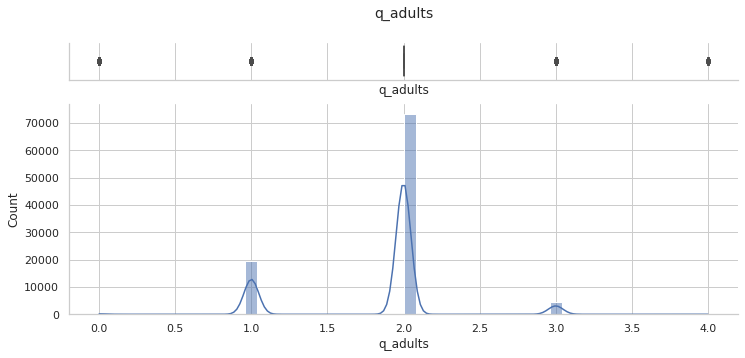

count    97641.000000
mean         1.843887
std          0.483393
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: q_adults, dtype: float64


-----------------------------------------------------------------------------------------------------
q_babies: Количественный параметр


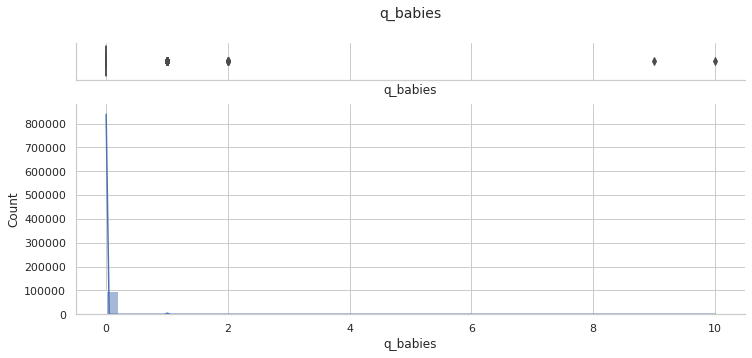

count    97641.000000
mean         0.006667
std          0.091790
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: q_babies, dtype: float64


-----------------------------------------------------------------------------------------------------
q_children: Количественный параметр


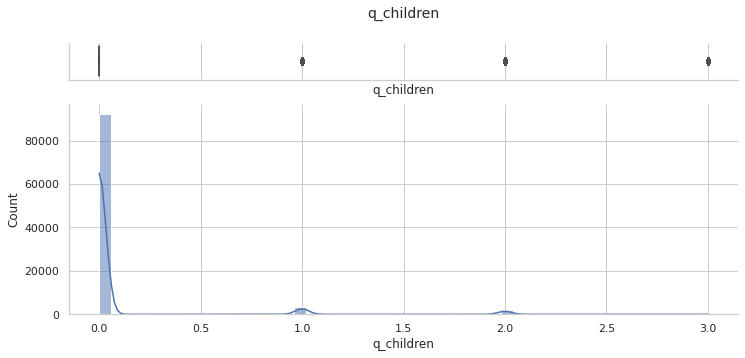

count    97641.000000
mean         0.077836
std          0.337358
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: q_children, dtype: float64


-----------------------------------------------------------------------------------------------------
q_booking_changes: Количественный параметр


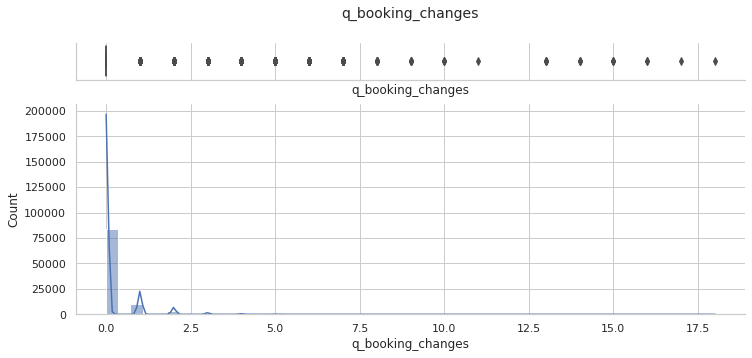

count    97641.000000
mean         0.201729
std          0.609830
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         18.000000
Name: q_booking_changes, dtype: float64


-----------------------------------------------------------------------------------------------------
q_days: Количественный параметр


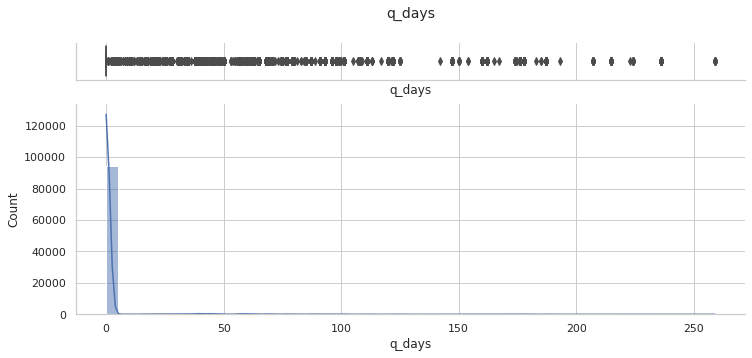

count    97641.000000
mean         2.314642
std         15.224212
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        259.000000
Name: q_days, dtype: float64


-----------------------------------------------------------------------------------------------------
q_lead_time: Количественный параметр


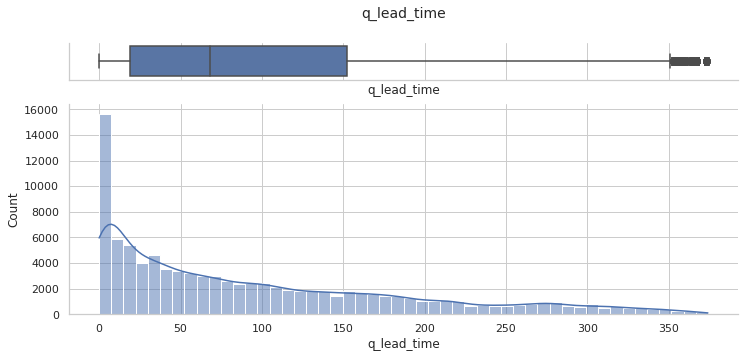

count    97641.000000
mean        96.752839
std         93.045823
min          0.000000
25%         19.000000
50%         68.000000
75%        152.000000
max        374.000000
Name: q_lead_time, dtype: float64


-----------------------------------------------------------------------------------------------------
q_visits_num: Количественный параметр


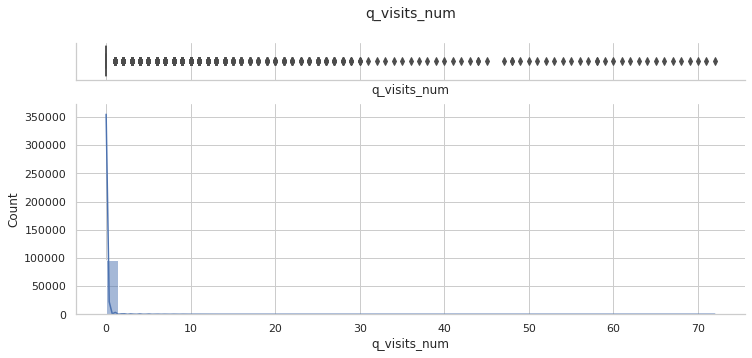

count    97641.000000
mean         0.128860
std          1.530961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         72.000000
Name: q_visits_num, dtype: float64


-----------------------------------------------------------------------------------------------------
q_canceled_num: Количественный параметр


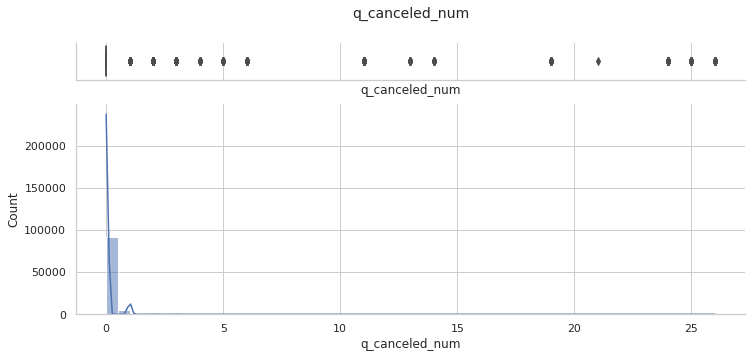

count    97641.000000
mean         0.089972
std          0.797737
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: q_canceled_num, dtype: float64


-----------------------------------------------------------------------------------------------------
q_parking_num: Количественный параметр


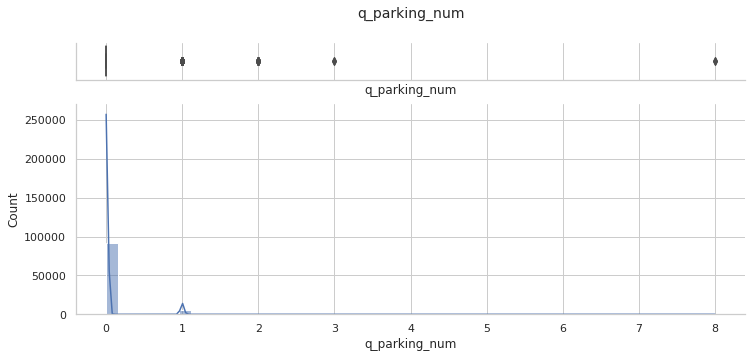

count    97641.000000
mean         0.053195
std          0.228000
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: q_parking_num, dtype: float64


-----------------------------------------------------------------------------------------------------
q_weekend_nights: Количественный параметр


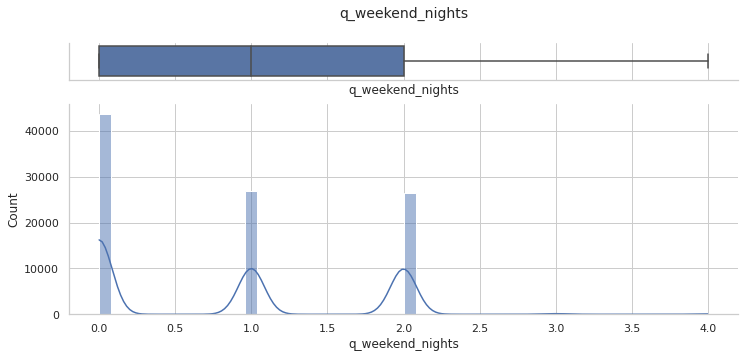

count    97641.000000
mean         0.839361
std          0.853682
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: q_weekend_nights, dtype: float64


-----------------------------------------------------------------------------------------------------
q_week_nights: Количественный параметр


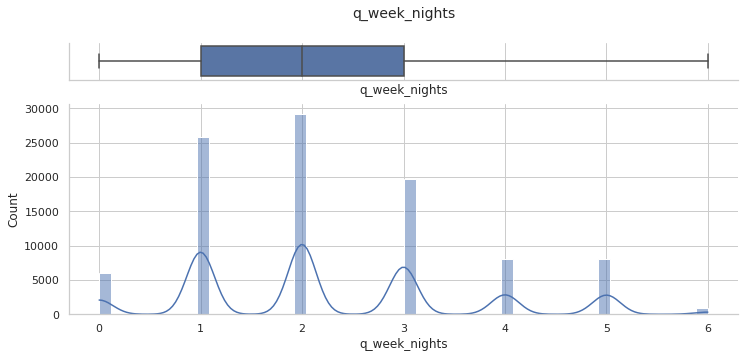

count    97641.000000
mean         2.263066
std          1.362798
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: q_week_nights, dtype: float64


-----------------------------------------------------------------------------------------------------
q_total_nights: Количественный параметр


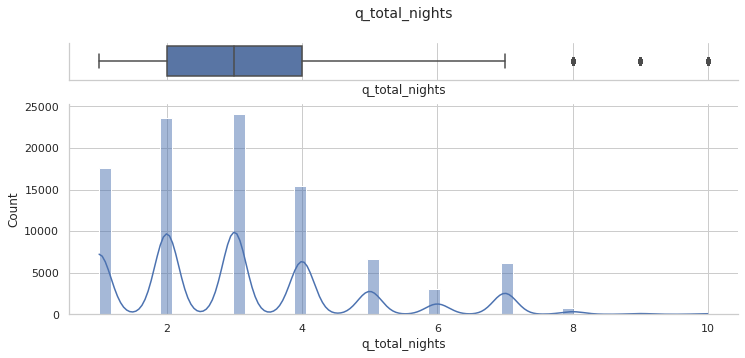

count    97641.000000
mean         3.102426
std          1.739882
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: q_total_nights, dtype: float64


-----------------------------------------------------------------------------------------------------
q_requests: Количественный параметр


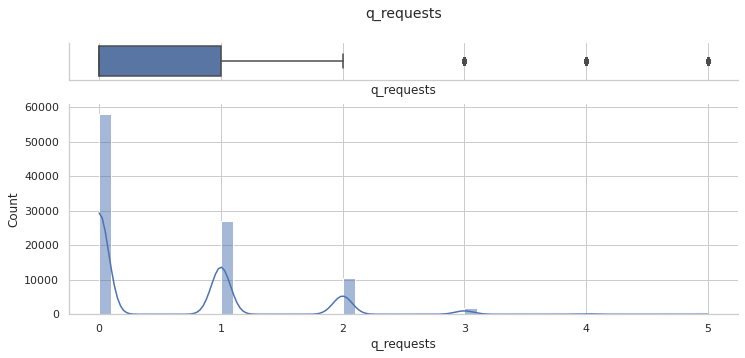

count    97641.000000
mean         0.560902
std          0.783654
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: q_requests, dtype: float64

In [12]:
print('Potentially quantitative features analysis:')
data_visualization(df[q_features])

<AxesSubplot:>

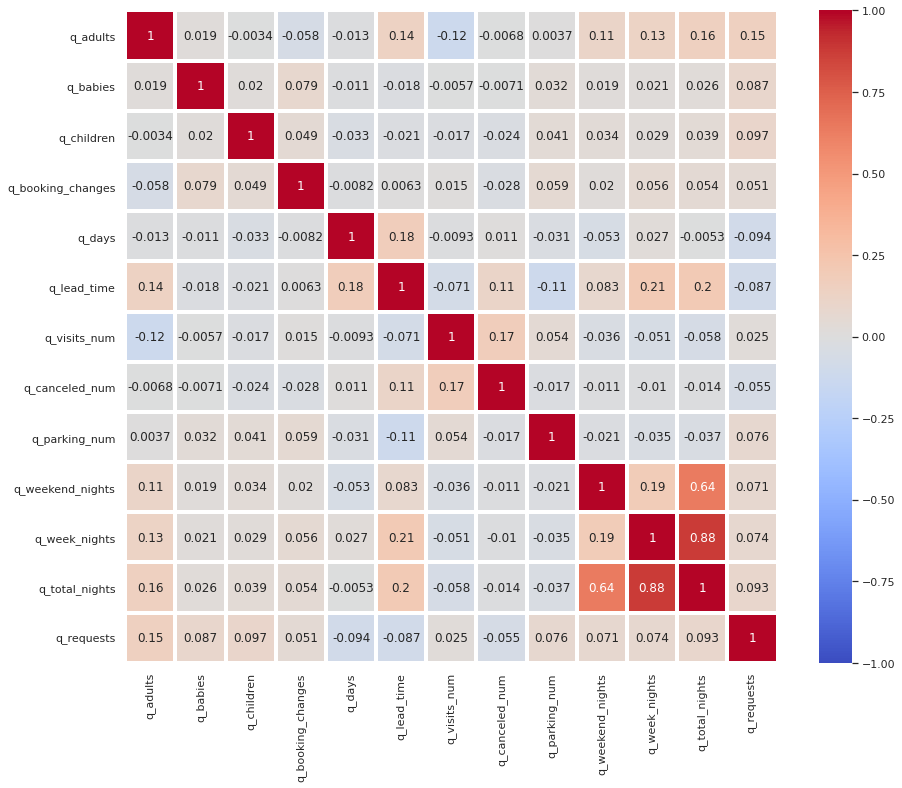

In [13]:
plt.figure(figsize=(15, 12))

sns.heatmap(
    df[q_features].corr(), vmax=1, vmin=-1, square=True, linewidths=3, annot=True, cmap='coolwarm'
)

### Анализ категориальных данных

Potentially categorical features analysis:

-----------------------------------------------------------------------------------------------------
c_year: Категориальный параметр


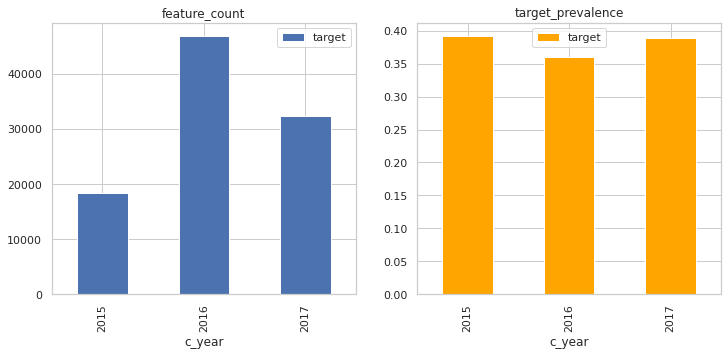

count    97641.000000
mean      2016.144243
std          0.706299
min       2015.000000
25%       2016.000000
50%       2016.000000
75%       2017.000000
max       2017.000000
Name: c_year, dtype: float64


-----------------------------------------------------------------------------------------------------
c_month: Категориальный параметр


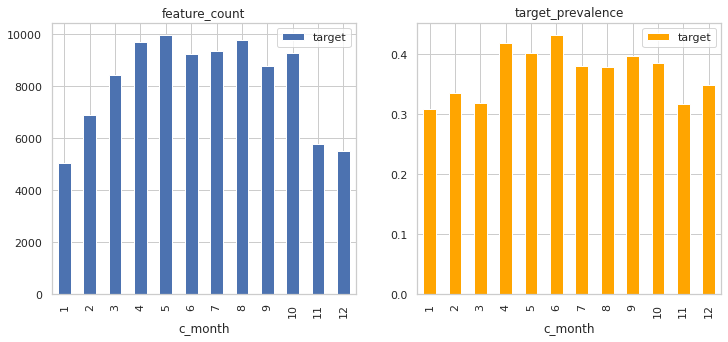

count    97641.000000
mean         6.477801
std          3.129301
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: c_month, dtype: float64


-----------------------------------------------------------------------------------------------------
c_week_num: Категориальный параметр


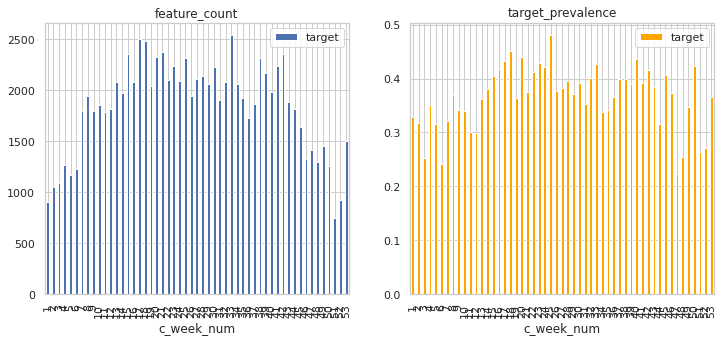

count    97641.000000
mean        26.846581
std         13.772847
min          1.000000
25%         16.000000
50%         27.000000
75%         38.000000
max         53.000000
Name: c_week_num, dtype: float64


-----------------------------------------------------------------------------------------------------
c_day: Категориальный параметр


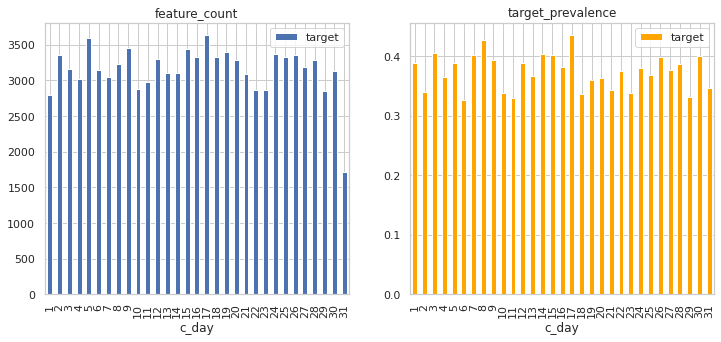

count    97641.000000
mean        15.784455
std          8.754660
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         31.000000
Name: c_day, dtype: float64


-----------------------------------------------------------------------------------------------------
c_country: Категориальный параметр


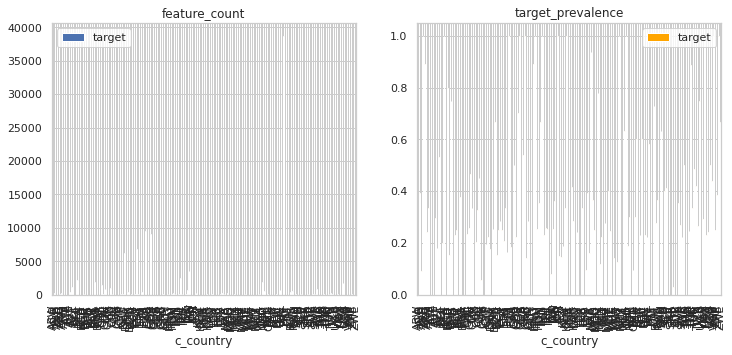

,c_country
index,
ABW,2
AGO,203
ALB,11
AND,2
ARE,37
...,...
VGB,1
VNM,8
ZAF,70



-----------------------------------------------------------------------------------------------------
c_customer_type: Категориальный параметр


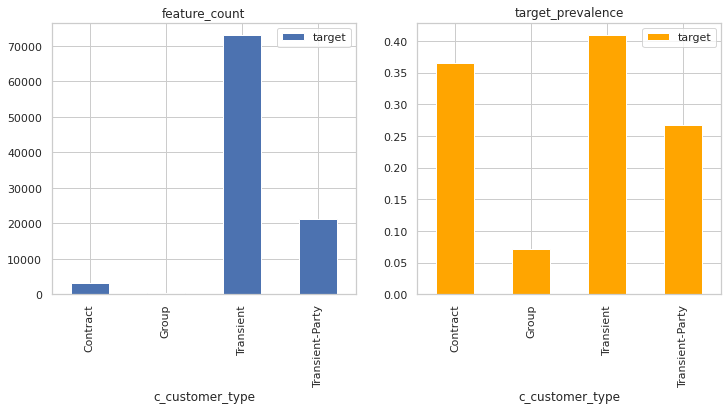

,c_customer_type
index,
Contract,3105
Group,452
Transient,72954
Transient-Party,21130



-----------------------------------------------------------------------------------------------------
c_channel: Категориальный параметр


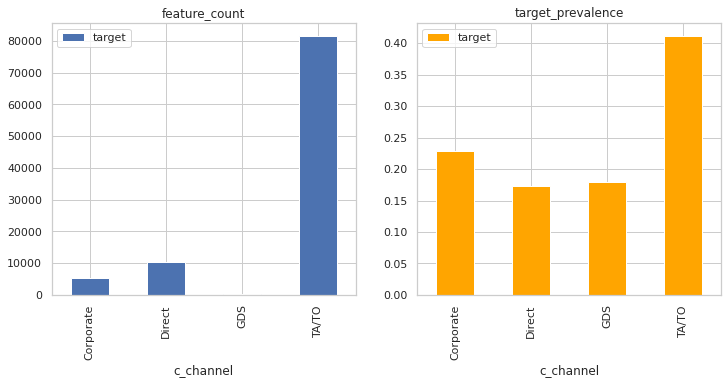

,c_channel
index,
Corporate,5425
Direct,10495
GDS,184
TA/TO,81537



-----------------------------------------------------------------------------------------------------
c_regular_customer: Категориальный параметр


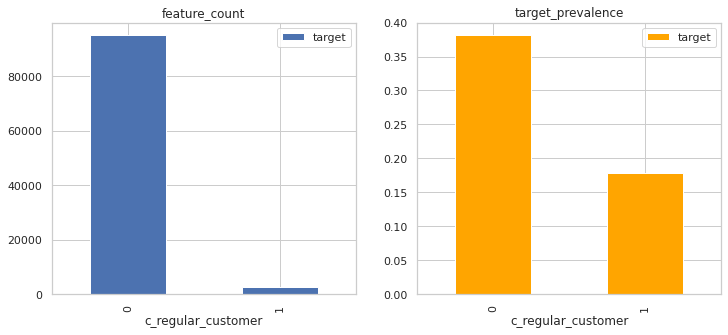

count    97641.000000
mean         0.028554
std          0.166549
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: c_regular_customer, dtype: float64


-----------------------------------------------------------------------------------------------------
c_meal: Категориальный параметр


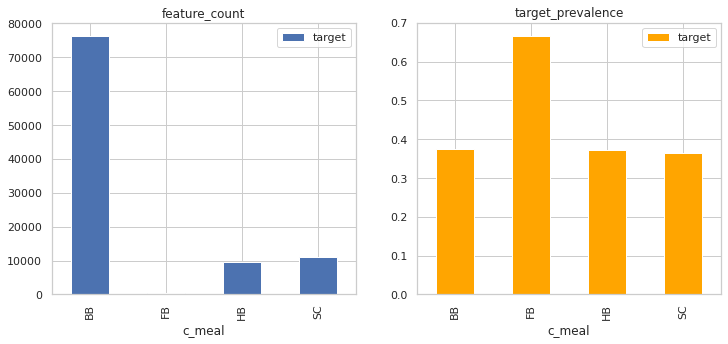

,c_meal
index,
BB,76381
FB,487
HB,9691
SC,11082



-----------------------------------------------------------------------------------------------------
c_room_class: Категориальный параметр


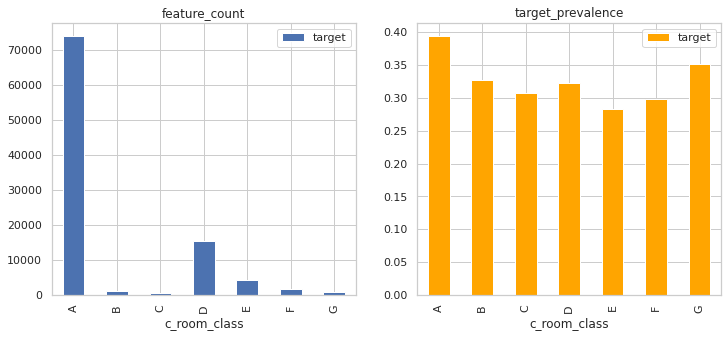

,c_room_class
index,
A,73972
B,1052
C,429
D,15510
E,4092
F,1716
G,870


In [14]:
print('Potentially categorical features analysis:')
data_visualization(df[c_features], show_target=False)

### Анализ целевого признака

Target balance analysis in train data:
-----------------------------------------------------------------------------------------------------
target


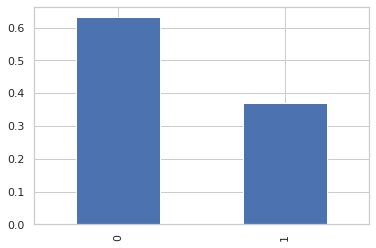

count    65229.000000
mean         0.368609
std          0.482431
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [15]:
print('Target balance analysis in train data:')
data_visualization(df.query('c_year < 2017')['target'])

Target balance analysis in test data:
-----------------------------------------------------------------------------------------------------
target


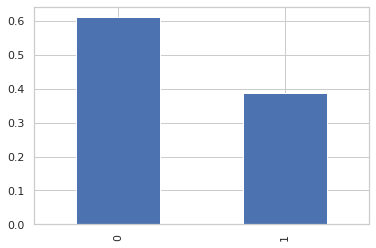

count    32412.000000
mean         0.388467
std          0.487409
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [16]:
print('Target balance analysis in test data:')
data_visualization(df.query('c_year >= 2017')['target'])

### Формирование датасета

Сформируем датасет следующим образом:
1. Определим топ 20 наиболее представленных стран;
2. Сформируем поле с независимым параметром `customer_costs`, содержащее информацию о стоимости брони для Клиента;
3. Формирование датасета с определением независимых параметров в виде:
    - категориальных параметров;
    - бинарных параметров;
    - целевого признака.

#### Определение топ 20 наиболее представленных стран

In [17]:
top20_countries = df['c_country'].value_counts().head(20)

top20_countries

PRT    38718
FRA     9451
GBR     9036
ESP     6832
DEU     6265
ITA     3480
IRL     2505
BEL     2127
BRA     1969
NLD     1875
USA     1782
CHE     1476
AUT     1155
CN       957
CHN      921
SWE      862
POL      770
ISR      639
RUS      513
NOR      503
Name: c_country, dtype: int64

#### Формирование поля со стоимостью брони для Клиента

In [18]:
customer_costs = calculate_revenue(
    df, 'target', 'q_total_nights', 'c_room_class', 'c_month', ROOMS_PRICES, SEASONAL_COEFFICIENTS, CLEANING_FREQ, feature=True
).rename('q_customer_costs')

customer_costs.head()

0     840.0
1    2240.0
2    1190.0
3    1190.0
4    3080.0
Name: q_customer_costs, dtype: float64

-----------------------------------------------------------------------------------------------------
q_customer_costs: Количественный параметр


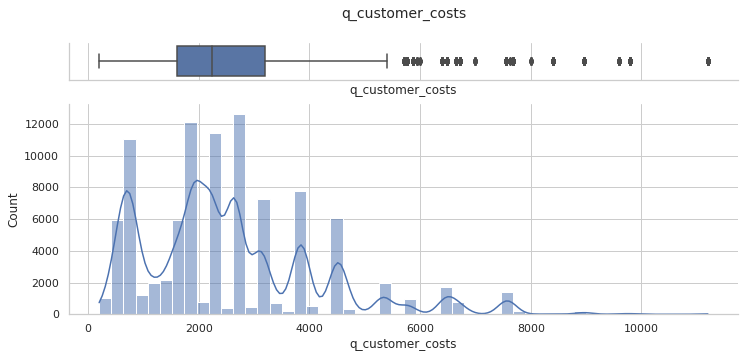

count    97641.000000
mean      2563.084872
std       1609.609488
min        200.000000
25%       1600.000000
50%       2240.000000
75%       3200.000000
max      11200.000000
Name: q_customer_costs, dtype: float64

In [19]:
data_visualization(pd.DataFrame(customer_costs))

-----------------------------------------------------------------------------------------------------
c_customer_costs: Категориальный параметр


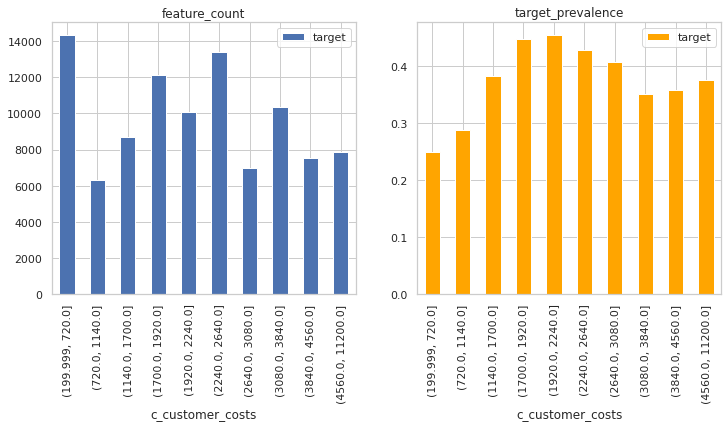

count                97641
unique                  10
top       (199.999, 720.0]
freq                 14320
Name: c_customer_costs, dtype: object

In [20]:
data_visualization(
    df.reset_index().merge(
        pd.qcut(customer_costs.rename('c_customer_costs'), 10).reset_index()
    ).drop('index', axis=1)[['c_customer_costs', 'target']]
    , show_target=False
)

#### Формирование датасета

In [21]:
ds = pd.DataFrame(
    {
        # id:
        'id':                      df['id'                ],

        # Sample separator:
        's_year':                  df['c_year'            ],

        # Categorical features:
        'c_lead_time':             pd.qcut(df['q_lead_time'], 10),
        'c_adults':                df['q_adults'          ].apply(str).apply(lambda x: '3+' if x != '1' and x != '2' else x),
        'c_weekend_nights':        df['q_weekend_nights'  ].apply(str).apply(lambda x: '2+' if x not in ['0', '1'] else x),
        'c_week_nights':           df['q_week_nights'     ].apply(str).apply(lambda x: '4+' if x not in ['0', '1', '2', '3'] else x),
        'c_total_nights':          df['q_total_nights'    ].apply(str).apply(lambda x: '5+' if x not in ['0', '1', '2', '3', '4'] else x),
        'c_month':                 df['c_month'           ].apply(str),
        'c_week_num':              df['c_week_num'        ].apply(str),
        'c_day':                   df['c_day'             ].apply(str),
        'c_country':               df['c_country'         ].apply(lambda x: 'other' if x not in top20_countries else x),
        'c_customer_type':         df['c_customer_type'   ],
        'c_channel':               df['c_channel'         ].apply(lambda x: 'other' if x != 'TA/TO' else x),
        'c_meal':                  df['c_meal'            ].apply(lambda x: 'other' if x != 'BB' else x),
        'c_room_class':            df['c_room_class'      ].apply(lambda x: 'other' if x != 'A' else x),

        # Binary features:
        'b_babies':                df['q_babies'          ].apply(lambda x: 1 if x > 0 else x),
        'b_children':              df['q_children'        ].apply(lambda x: 1 if x > 0 else x),
        'b_is_booking_changed':    df['q_booking_changes' ].apply(lambda x: 1 if x > 0 else x),
        'b_one_day_waiting':       df['q_days'            ].apply(lambda x: 1 if x > 0 else x),
        'b_is_visited_once':       df['q_visits_num'      ].apply(lambda x: 1 if x > 0 else x),
        'b_is_canceled':           df['q_canceled_num'    ].apply(lambda x: 1 if x > 0 else x),
        'b_is_parking':            df['q_parking_num'     ].apply(lambda x: 1 if x > 0 else x),
        'b_requests':              df['q_requests'        ].apply(lambda x: 1 if x > 0 else x),
        'b_regular_customer':      df['c_regular_customer'],

        # Composite Categorical features:
        'cc_customer_costs':       pd.qcut(customer_costs, 10),

        # Target:
        'target':                  df['target'            ]
    }
)

b_features = ['target']
for i in ds.columns:
    if not pd.isna(re.search('^b.*', i)):
        b_features.append(i)

c_features = ['target']
for i in ds.columns:
    if not pd.isna(re.search('^c.*', i)):
        c_features.append(i)

print('No columns and rows are missing:', ds.shape[1] >= df.shape[1])
print('DS shape:                       ', ds.shape)
print()
ds.head()

No columns and rows are missing: True
DS shape:                        (97641, 26)



,id,s_year,c_lead_time,c_adults,c_weekend_nights,c_week_nights,c_total_nights,c_month,c_week_num,c_day,c_country,c_customer_type,c_channel,c_meal,c_room_class,b_babies,b_children,b_is_booking_changed,b_one_day_waiting,b_is_visited_once,b_is_canceled,b_is_parking,b_requests,b_regular_customer,cc_customer_costs,target
0,0,2015,"(3.0, 12.0]",1,0,1,1,7,27,1,GBR,Transient,other,BB,A,0,0,0,0,0,0,0,0,0,"(720.0, 1140.0]",0
1,1,2015,"(12.0, 27.0]",2,0,2,2,7,27,1,GBR,Transient,TA/TO,BB,A,0,0,0,0,0,0,0,1,0,"(1920.0, 2240.0]",0
2,2,2015,"(-0.001, 3.0]",2,0,2,2,7,27,1,PRT,Transient,other,BB,other,0,0,0,0,0,0,0,0,0,"(1140.0, 1700.0]",0
3,3,2015,"(3.0, 12.0]",2,0,2,2,7,27,1,PRT,Transient,other,other,other,0,0,0,0,0,0,0,1,0,"(1140.0, 1700.0]",0
4,4,2015,"(68.0, 96.0]",2,0,3,3,7,27,1,PRT,Transient,TA/TO,BB,A,0,0,0,0,0,0,0,1,0,"(2640.0, 3080.0]",1


### Анализ датасета

Potentially categorical features analysis:

-----------------------------------------------------------------------------------------------------
c_lead_time: Категориальный параметр


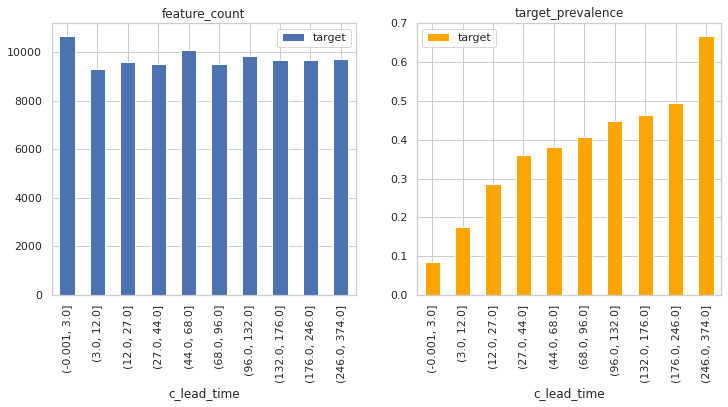

count             97641
unique               10
top       (-0.001, 3.0]
freq              10668
Name: c_lead_time, dtype: object


-----------------------------------------------------------------------------------------------------
c_adults: Категориальный параметр


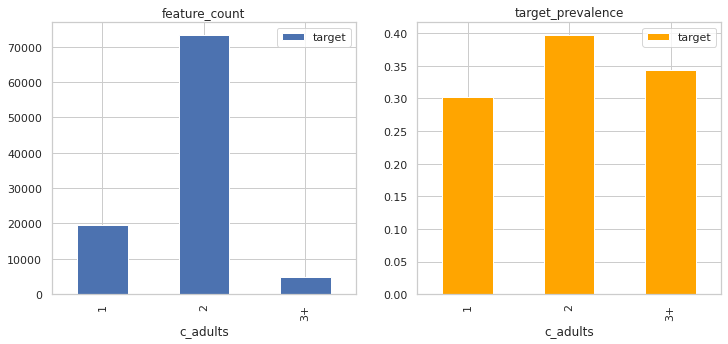

,c_adults
index,
1,19492
2,73217
3+,4932



-----------------------------------------------------------------------------------------------------
c_weekend_nights: Категориальный параметр


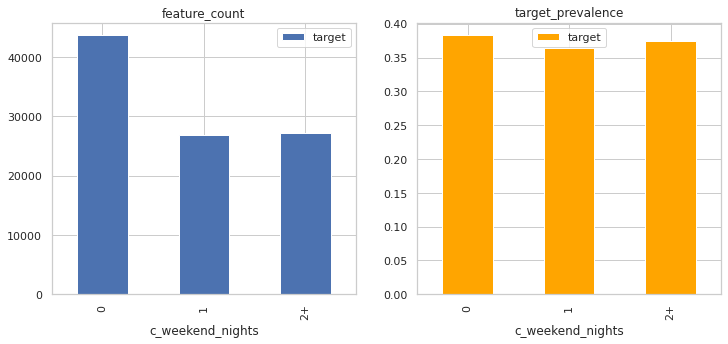

,c_weekend_nights
index,
0,43653
1,26826
2+,27162



-----------------------------------------------------------------------------------------------------
c_week_nights: Категориальный параметр


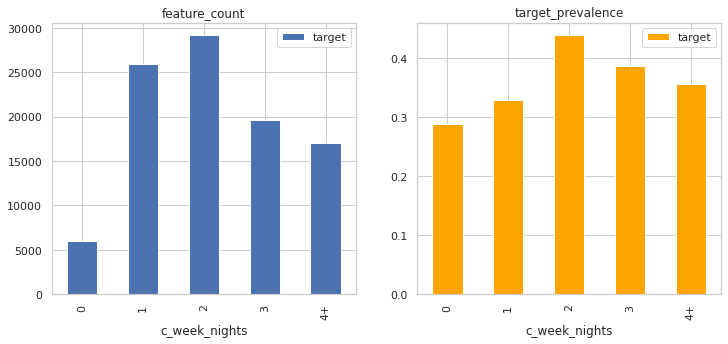

,c_week_nights
index,
0,5944
1,25888
2,29141
3,19667
4+,17001



-----------------------------------------------------------------------------------------------------
c_total_nights: Категориальный параметр


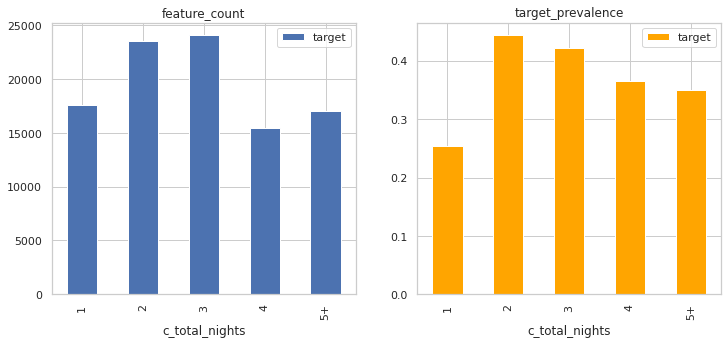

,c_total_nights
index,
1,17587
2,23555
3,24047
4,15457
5+,16995



-----------------------------------------------------------------------------------------------------
c_month: Категориальный параметр


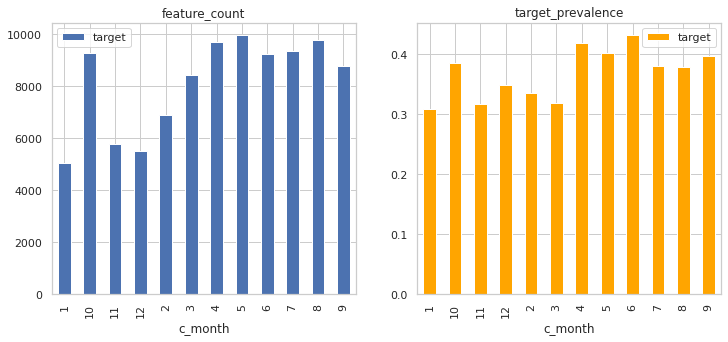

,c_month
index,
1,5042
10,9255
11,5761
12,5497
2,6901
3,8425
4,9682
5,9939
6,9239



-----------------------------------------------------------------------------------------------------
c_week_num: Категориальный параметр


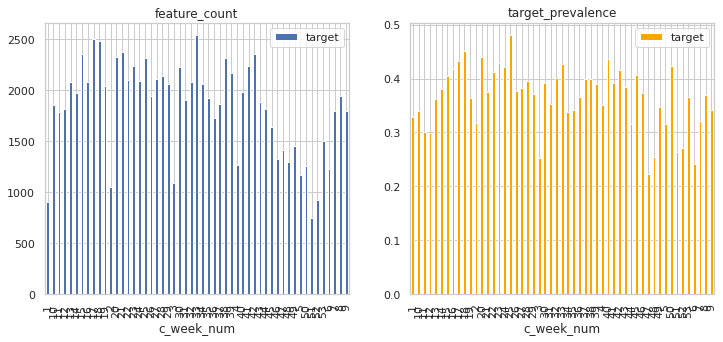

,c_week_num
index,
1,905
10,1852
11,1790
12,1814
13,2079
14,1979
15,2355
16,2083
17,2505



-----------------------------------------------------------------------------------------------------
c_day: Категориальный параметр


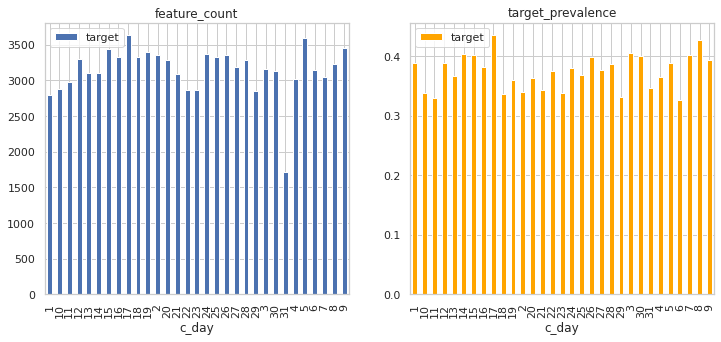

,c_day
index,
1,2801
10,2884
11,2974
12,3300
13,3097
14,3109
15,3446
16,3329
17,3630



-----------------------------------------------------------------------------------------------------
c_country: Категориальный параметр


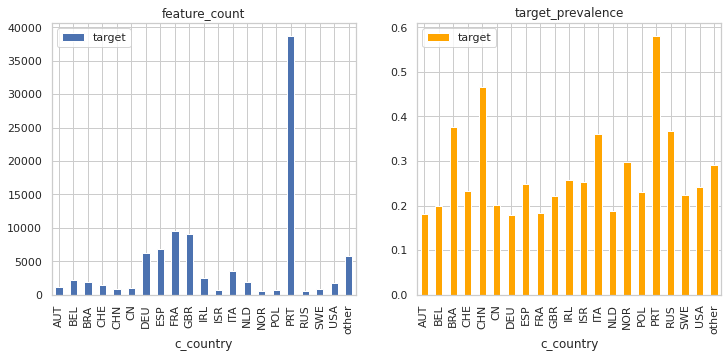

,c_country
index,
AUT,1155
BEL,2127
BRA,1969
CHE,1476
CHN,921
CN,957
DEU,6265
ESP,6832
FRA,9451



-----------------------------------------------------------------------------------------------------
c_customer_type: Категориальный параметр


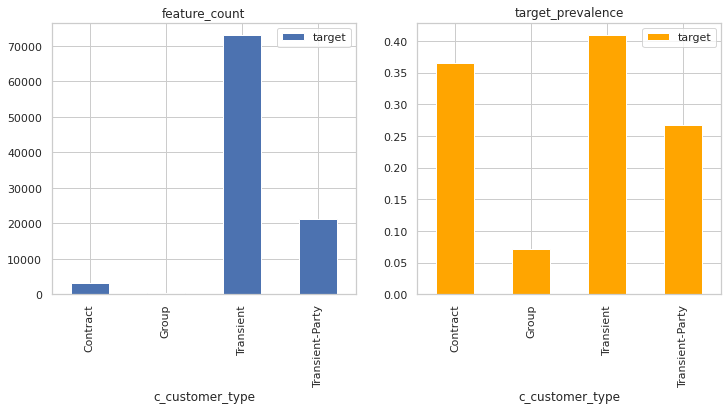

,c_customer_type
index,
Contract,3105
Group,452
Transient,72954
Transient-Party,21130



-----------------------------------------------------------------------------------------------------
c_channel: Категориальный параметр


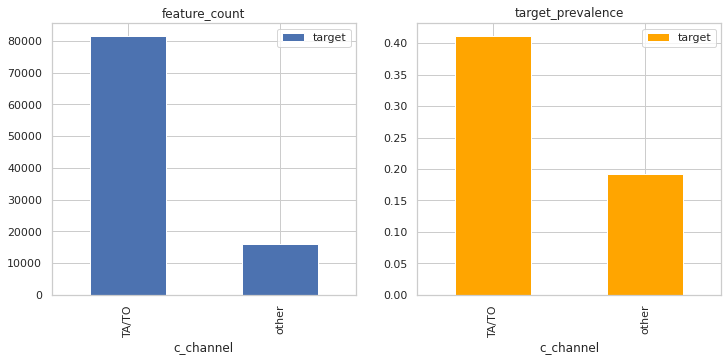

,c_channel
index,
TA/TO,81537
other,16104



-----------------------------------------------------------------------------------------------------
c_meal: Категориальный параметр


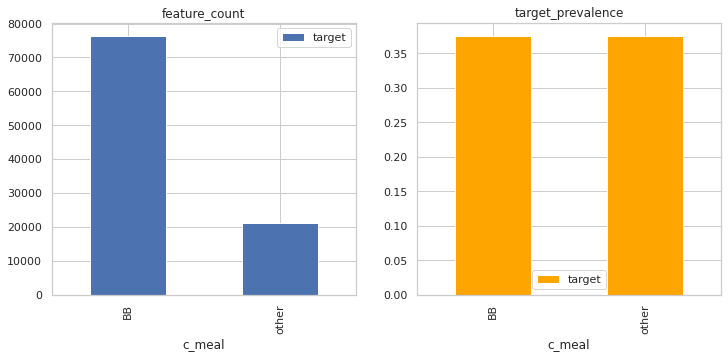

,c_meal
index,
BB,76381
other,21260



-----------------------------------------------------------------------------------------------------
c_room_class: Категориальный параметр


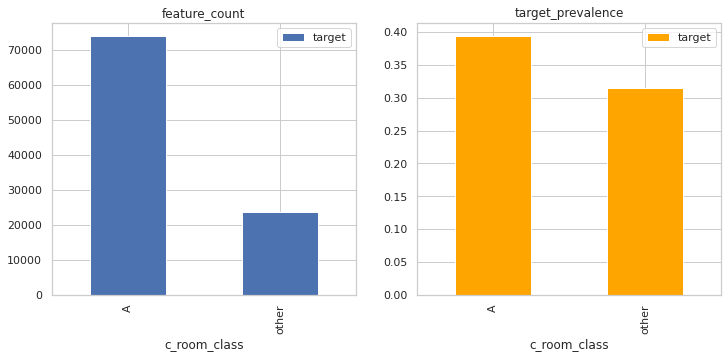

,c_room_class
index,
A,73972
other,23669



-----------------------------------------------------------------------------------------------------
cc_customer_costs: Категориальный параметр


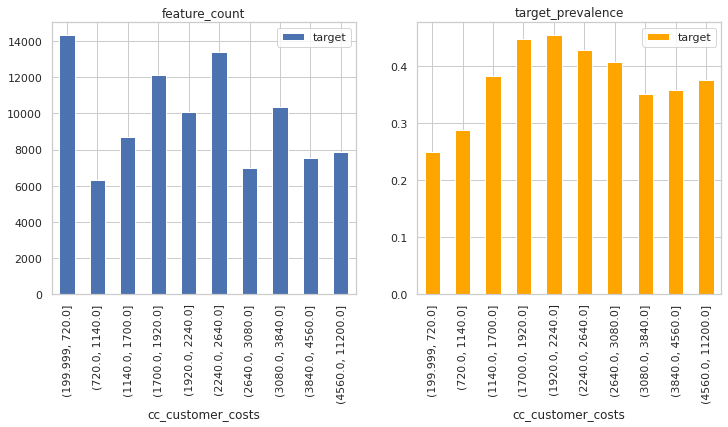

count                97641
unique                  10
top       (199.999, 720.0]
freq                 14320
Name: cc_customer_costs, dtype: object

In [22]:
print('Potentially categorical features analysis:')
data_visualization(ds[c_features], show_target=False)

Potentially categorical features analysis:

-----------------------------------------------------------------------------------------------------
b_babies: Категориальный параметр


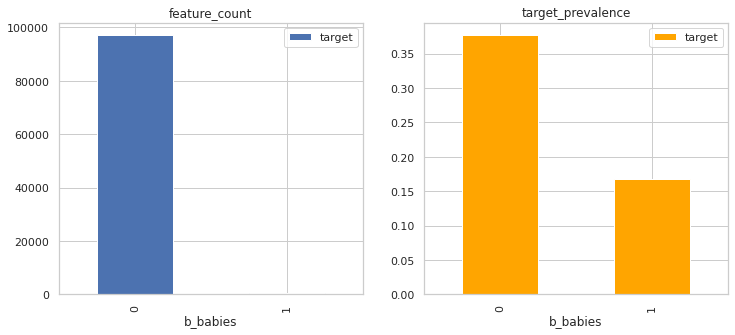

count    97641.000000
mean         0.006421
std          0.079877
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_babies, dtype: float64


-----------------------------------------------------------------------------------------------------
b_children: Категориальный параметр


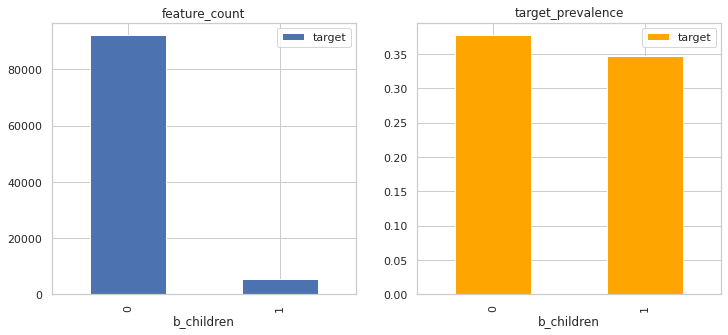

count    97641.000000
mean         0.057035
std          0.231912
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_children, dtype: float64


-----------------------------------------------------------------------------------------------------
b_is_booking_changed: Категориальный параметр


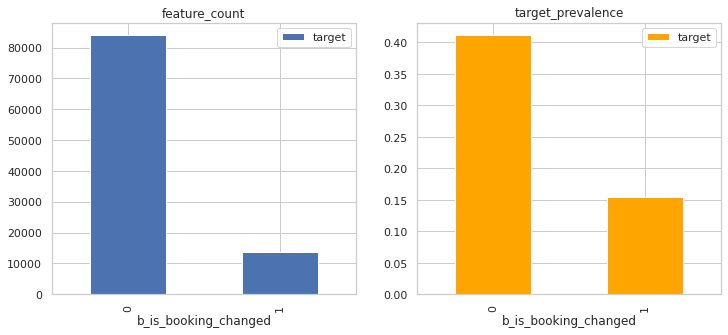

count    97641.000000
mean         0.140320
std          0.347321
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_is_booking_changed, dtype: float64


-----------------------------------------------------------------------------------------------------
b_one_day_waiting: Категориальный параметр


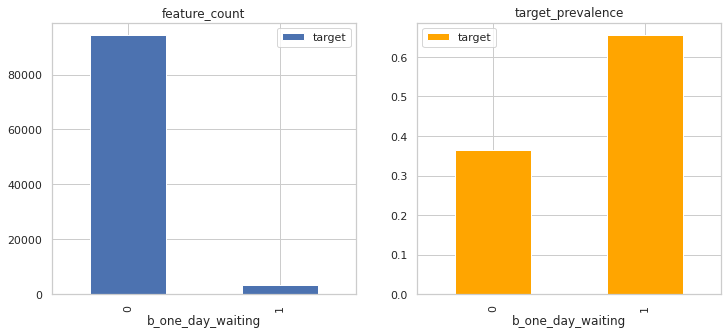

count    97641.000000
mean         0.034832
std          0.183354
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_one_day_waiting, dtype: float64


-----------------------------------------------------------------------------------------------------
b_is_visited_once: Категориальный параметр


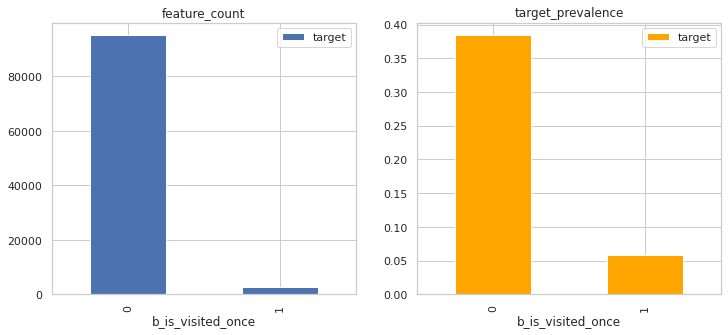

count    97641.000000
mean         0.026556
std          0.160784
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_is_visited_once, dtype: float64


-----------------------------------------------------------------------------------------------------
b_is_canceled: Категориальный параметр


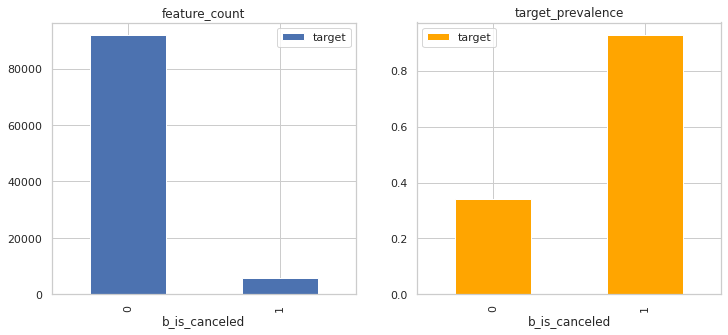

count    97641.000000
mean         0.060057
std          0.237593
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_is_canceled, dtype: float64


-----------------------------------------------------------------------------------------------------
b_is_parking: Категориальный параметр


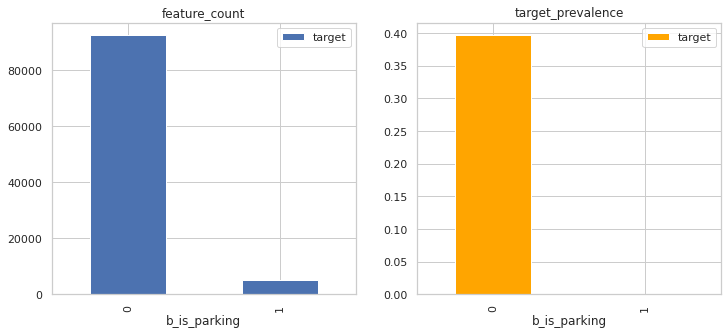

count    97641.000000
mean         0.052836
std          0.223708
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_is_parking, dtype: float64


-----------------------------------------------------------------------------------------------------
b_requests: Категориальный параметр


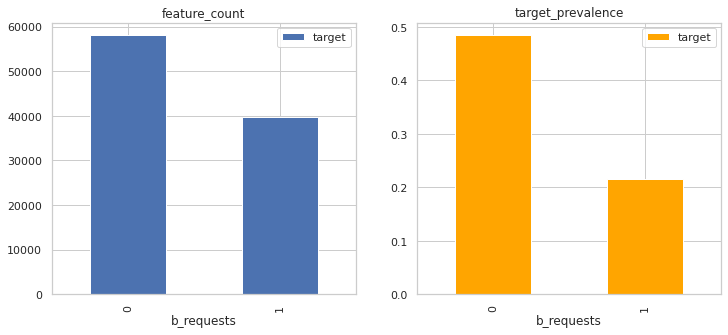

count    97641.000000
mean         0.405895
std          0.491067
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: b_requests, dtype: float64


-----------------------------------------------------------------------------------------------------
b_regular_customer: Категориальный параметр


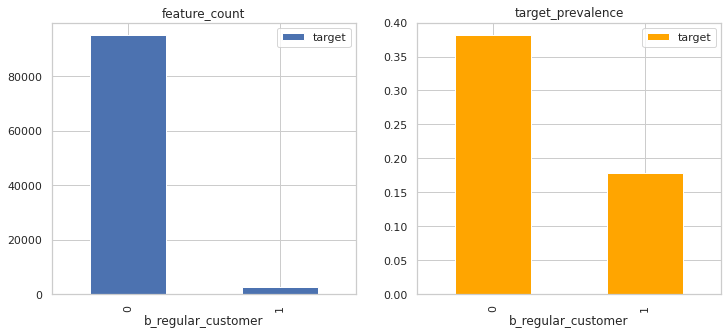

count    97641.000000
mean         0.028554
std          0.166549
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: b_regular_customer, dtype: float64

In [23]:
print('Potentially categorical features analysis:')
data_visualization(ds[b_features], show_target=False)

Target balance analysis in train data:
-----------------------------------------------------------------------------------------------------
target


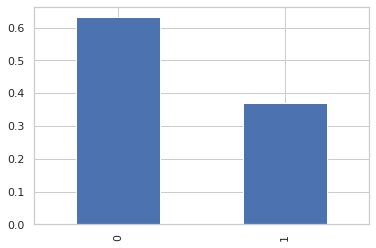

count    65229.000000
mean         0.368609
std          0.482431
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [24]:
print('Target balance analysis in train data:')
data_visualization(ds.query('s_year < 2017')['target'])

Target balance analysis in test data:
-----------------------------------------------------------------------------------------------------
target


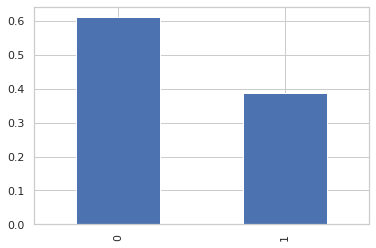

count    32412.000000
mean         0.388467
std          0.487409
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [25]:
print('Target balance analysis in test data:')
data_visualization(ds.query('s_year >= 2017')['target'])

### Препроцессинг датасета

Осуществим препроцессинг с помощью порядкого кодирования независимых признаков

In [26]:
ds_encoded = ds.reset_index(drop=True)

encoder = OrdinalEncoder()

for i in ds_encoded.drop('id', axis=1):
    if not pd.isna(re.search('^c.*', i)) and i != 'c_year':
        ds_encoded[i] = pd.DataFrame(encoder.fit_transform(ds_encoded[i].reset_index()),
                             columns=ds_encoded[i].reset_index().columns).drop('index', axis=1)

### Формирование выборок

Поскольку в данных присутствует дисбаланс, осуществим балансировку `target` с помощью метода `upsample` из библиотеки `sklearn`.

-----------------------------------------------------------------------------------------------------
target


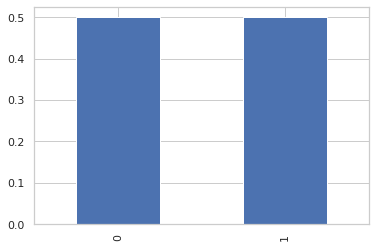

count    82370.000000
mean         0.500000
std          0.500003
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: target, dtype: float64

In [27]:
train_ds = ds_encoded.query('s_year < 2017')
# train_ds = train_ds.drop_duplicates(subset=train_ds.columns.drop('id'))
train_ds_upsampled = make_upsamle(train_ds, train_ds[train_ds['target'] == 0].shape[0] , target=1)

test_ds = ds_encoded.query('s_year >= 2017').reset_index(drop=True)

In [28]:
X_train = train_ds.drop(columns=['id', 'target', 's_year'])
y_train = train_ds['target']

X_train_upsampled = train_ds_upsampled.drop(columns=['id', 'target', 's_year'])
y_train_upsampled = train_ds_upsampled['target']
# X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, round(ds[ds.target == 0].shape[0] / ds[ds.target == 1].shape[0])+1)

X_test = test_ds.drop(columns=['id', 'target', 's_year'])
y_test = test_ds['target']

## 3. Формулировка ML-задачи на основе бизнес-задачи

Поскольку целью данной работы является разработка модели, способной предсказать отказ клиента от брони, для уменьшения издержек Отеля, необходимо в первую очередь определить финансовые показатели за тестовый период.

In [29]:
revenue_2017 = calculate_revenue(df.query('c_year >= 2017'), 'target', 'q_total_nights', 'c_room_class', 'c_month', ROOMS_PRICES, SEASONAL_COEFFICIENTS, CLEANING_FREQ)
costs_2017 = calculate_costs(df.query('c_year >= 2017'), 'target', 'q_total_nights', 'c_room_class', 'c_month', ROOMS_PRICES, SEASONAL_COEFFICIENTS, CLEANING_FREQ)
profit_2017 = calculate_profit(df.query('c_year >= 2017'), 'target', 'q_total_nights', 'c_room_class', 'c_month', ROOMS_PRICES, SEASONAL_COEFFICIENTS, CLEANING_FREQ)

marginality_2017 = round(round(profit_2017 / revenue_2017, 4) * 100, 4)

print('Hotel financial performance in 2017:')
print()
print('Revenue    :', revenue_2017)
print('Costs      :', costs_2017)
print('Profit     :', profit_2017)
print('Marginality:', f'{marginality_2017}%')

Hotel financial performance in 2017:

Revenue    : 50623050.0
Costs      : 18041560.0
Profit     : 32581490.0
Marginality: 64.36%


Таким образом, ML-задача состоит в разработке такой моедели, которая способна уменьшенить издержки Отеля, увеличенить прибыль и маржинальность Отеля.

## 4. Разработка ML-модели

Для определение наиболее оптимальной ML-модели выполним следующие шаги:
1. С помощью метода кросс-валидации определить наиболее оптимальную ML-модель для решения поставленной задачи;
2. Обучить наиболее оптимальную модель на обучающей выборке;
3. Протестировать наиболее оптимальную модель на тестовой выборке;
4. Проанализировать экномический эффект внедрения модели на тестовом периоде.

### Определение наиболее оптимальной моделей с помощью кросс-валидации

Для разработки ML-модели используем следующие модели:
- Логистическая регрессия;
- Дерево решений;
- Случайный лес.

In [30]:
%%time

X_train_lr = pd.get_dummies(X_train_upsampled, drop_first=True, columns=X_train_upsampled.columns)

lr_model = LogisticRegression(random_state=RANDOM_STATE)

lg_f1 = cross_val_score(
    lr_model,
    X_train_lr,
    y_train_upsampled,
    cv=10,
    scoring='f1')
f1_lr = pd.Series(lg_f1).mean()

print('Logistic Regression results:')
print()
print('F1:', f1_lr)
print()

Logistic Regression results:

F1: 0.7582603162835695

CPU times: user 1min 26s, sys: 39.9 s, total: 2min 6s
Wall time: 2min 6s


In [31]:
X_train_upsampled

,c_lead_time,c_adults,c_weekend_nights,c_week_nights,c_total_nights,c_month,c_week_num,c_day,c_country,c_customer_type,c_channel,c_meal,c_room_class,b_babies,b_children,b_is_booking_changed,b_one_day_waiting,b_is_visited_once,b_is_canceled,b_is_parking,b_requests,b_regular_customer,cc_customer_costs
44769,6.0,1.0,0.0,1.0,0.0,4.0,51.0,10.0,16.0,3.0,1.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0.0
33573,6.0,1.0,2.0,2.0,3.0,1.0,36.0,30.0,16.0,3.0,0.0,0.0,0.0,0,0,1,0,0,0,0,1,0,7.0
2290,4.0,1.0,1.0,1.0,1.0,3.0,48.0,20.0,16.0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,2.0
19965,5.0,0.0,0.0,2.0,1.0,11.0,31.0,9.0,16.0,3.0,0.0,1.0,0.0,0,0,0,0,0,0,0,0,0,3.0
39561,9.0,1.0,1.0,1.0,1.0,1.0,35.0,1.0,16.0,2.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,2.0,1.0,2.0,4.0,4.0,3.0,48.0,23.0,4.0,2.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0,6.0
65225,4.0,1.0,2.0,3.0,4.0,3.0,48.0,24.0,8.0,2.0,0.0,1.0,1.0,0,0,0,0,0,0,0,1,0,5.0
65226,1.0,1.0,2.0,4.0,4.0,3.0,48.0,24.0,8.0,2.0,0.0,0.0,1.0,0,0,0,0,0,0,0,1,0,6.0
65227,2.0,1.0,2.0,4.0,4.0,3.0,48.0,23.0,8.0,2.0,0.0,1.0,0.0,0,0,0,0,0,0,0,1,0,9.0


In [32]:
%%time

dt_model = DecisionTreeClassifier(random_state=RANDOM_STATE, max_depth=8)

dt_f1 = cross_val_score(dt_model, X_train_upsampled, y_train_upsampled, cv=10, scoring='f1')
f1_dt = pd.Series(dt_f1).mean()

print('Decision Tree results:')
print()
print('F1:', f1_dt)
print()

Decision Tree results:

F1: 0.7811161162787303

CPU times: user 1.83 s, sys: 2.7 ms, total: 1.83 s
Wall time: 1.84 s


In [33]:
%%time

rf_model = RandomForestClassifier(random_state=RANDOM_STATE, max_depth=9, n_estimators=100)

rf_f1 = cross_val_score(rf_model, X_train_upsampled, y_train_upsampled, cv=10, scoring='f1')
f1_rf = pd.Series(rf_f1).mean()

print('Random Forest results:')
print()
print('F1:', f1_rf)
print()

Random Forest results:

F1: 0.7863931090280692

CPU times: user 35 s, sys: 96.1 ms, total: 35 s
Wall time: 35.1 s


In [34]:
models_res = pd.DataFrame(
    {
        'LogisticRegression':     [f1_lr],
        'DecisionTreeClassifier': [f1_dt],
        'RandomForestClassifier': [f1_rf]
    }
).T.reset_index().rename(columns={'index': 'model', 0: 'res'})

models_res.max()

model    RandomForestClassifier
res                    0.786393
dtype: object

Наиболее оптимальной моделью является случайный лес.

### Обучение модели

In [35]:
%%time

hyperparameters = {
    'max_depth': [x for x in range(5, 10, 2)],
    'n_estimators': [x for x in range(10, 101, 10)],
}

rf_best_model = GridSearchCV(RandomForestClassifier(random_state=RANDOM_STATE), hyperparameters, verbose=1, scoring='f1')
rf_best_model.fit(X_train_upsampled, y_train_upsampled)

best_params = rf_best_model.best_params_

print('Best models hyperparameters:')
print(pd.Series(best_params))
print('Best models score:', rf_best_model.best_score_)
print()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best models hyperparameters:
max_depth        9
n_estimators    10
dtype: int64
Best models score: 0.7856898413199147

CPU times: user 3min 41s, sys: 759 ms, total: 3min 42s
Wall time: 3min 42s


In [36]:
%%time

model = RandomForestClassifier(
    **best_params,
     random_state=RANDOM_STATE,
#     max_depth=best_params['max_depth'],
#     n_estimators= best_params['n_estimators']
)
model.fit(X_train_upsampled, y_train_upsampled)

predictions = model.predict(X_test)

CPU times: user 447 ms, sys: 3.31 ms, total: 450 ms
Wall time: 456 ms


,metrics,score
0,accuracy,0.820505
1,precision,0.842946
2,recall,0.787787
3,f1,0.814434
4,auc,0.905963


Confusion Matrix


,0,1
0,35140,6045
1,8740,32445


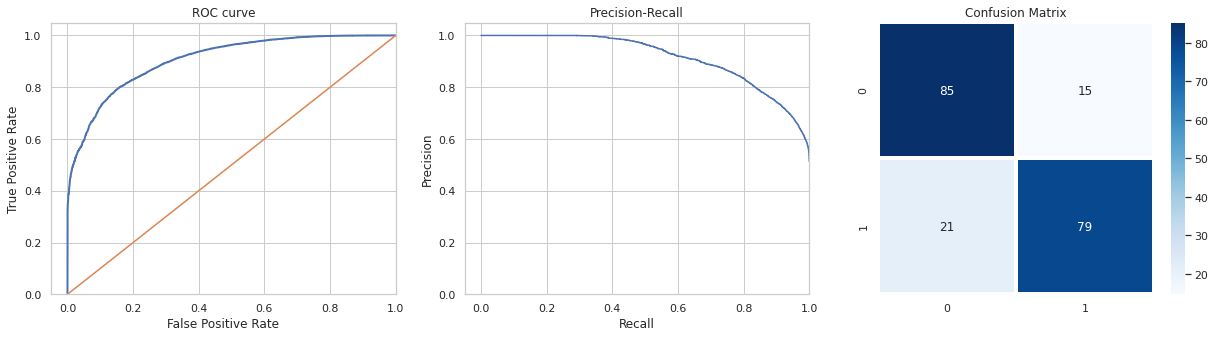

In [37]:
create_metrics(model=model, X=X_train_upsampled, y=y_train_upsampled, only_result=False)

### Тестирование модели

,metrics,score
0,accuracy,0.762125
1,precision,0.731612
2,recall,0.612263
3,f1,0.666638
4,auc,0.815586


Confusion Matrix


,0,1
0,16993,2828
1,4882,7709


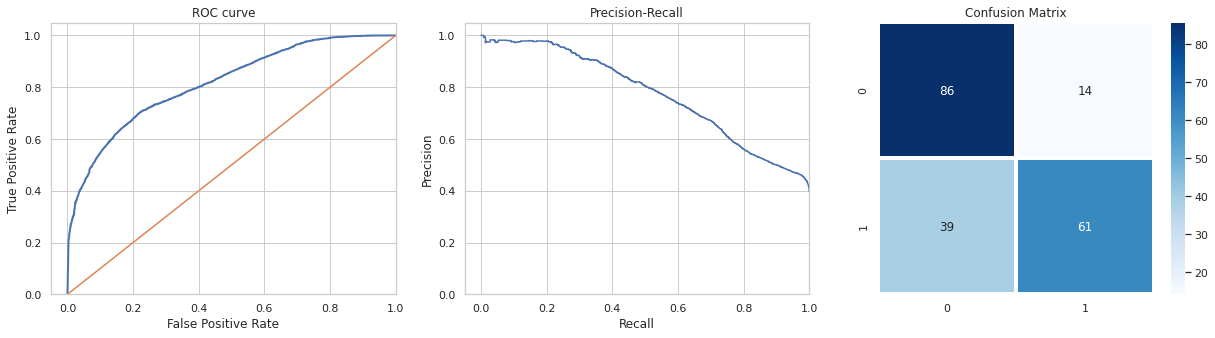

In [38]:
create_metrics(model=model, X=X_test, y=y_test, only_result=False)

### Анализ экономического эффекта внедрения моедели

In [39]:
results = df.query(
    'c_year >= 2017'
).reset_index(drop=True).reset_index().merge(
    pd.Series(predictions).rename('predictions').reset_index(), on='index'
).drop('index', axis=1)

results.head()

,id,q_adults,q_babies,q_children,q_booking_changes,q_days,q_lead_time,q_visits_num,q_canceled_num,q_parking_num,q_weekend_nights,q_week_nights,q_total_nights,q_requests,c_year,c_month,c_week_num,c_day,c_country,c_customer_type,c_channel,c_regular_customer,c_meal,c_room_class,target,predictions
0,6086,2,0,0,0,0,74,0,0,0,1,0,1,0,2017,1,1,1,PRT,Transient,TA/TO,0,BB,A,1,1
1,6087,2,0,0,0,0,62,0,0,0,2,2,4,1,2017,1,1,1,AUT,Transient,TA/TO,0,BB,A,1,0
2,6088,2,0,0,0,0,62,0,0,0,2,2,4,1,2017,1,1,1,AUT,Transient,TA/TO,0,BB,A,1,0
3,6089,1,0,0,0,0,71,0,0,0,2,2,4,1,2017,1,1,1,PRT,Transient,TA/TO,0,BB,A,1,0
4,6090,2,0,0,0,0,172,0,0,0,2,5,7,0,2017,1,1,1,BEL,Transient,TA/TO,0,BB,A,1,0


In [40]:
test_revenue = calculate_revenue(
    results, 'target', 'q_total_nights', 'c_room_class', 'c_month', ROOMS_PRICES, SEASONAL_COEFFICIENTS, CLEANING_FREQ, feature=True)

test_costs = calculate_costs(
    results, 'target', 'q_total_nights', 'c_room_class', 'c_month', ROOMS_PRICES, SEASONAL_COEFFICIENTS, CLEANING_FREQ, feature=True)

results = results.reset_index().merge(
    test_revenue.reset_index().rename(columns={'profit': 'revenue'}).merge(
        test_costs.reset_index()
    ), on='index'
).drop('index', axis=1)

results['revenue'] = results['revenue'].where(results['target'] != 1, 0)
results['costs'] = results['costs'].where(results['revenue'] == 0, 0)

results['costs_after_model'] = results['costs'].where(results['predictions'] != 1, results['costs'] * (1 - DEPOSIT))

results.sample(10)

,id,q_adults,q_babies,q_children,q_booking_changes,q_days,q_lead_time,q_visits_num,q_canceled_num,q_parking_num,q_weekend_nights,q_week_nights,q_total_nights,q_requests,c_year,c_month,c_week_num,c_day,c_country,c_customer_type,c_channel,c_regular_customer,c_meal,c_room_class,target,predictions,revenue,costs,costs_after_model
18715,84207,2,0,0,0,0,0,0,0,0,1,1,2,0,2017,1,1,7,PRT,Transient,TA/TO,0,SC,A,0,0,1600.0,0.0,0.0
7734,44923,2,0,0,0,0,306,0,0,0,1,3,4,0,2017,1,1,2,ITA,Transient-Party,TA/TO,0,SC,A,1,0,0.0,1400.0,1400.0
14687,51876,2,0,0,0,0,65,0,0,0,1,4,5,0,2017,6,23,5,CHN,Transient,TA/TO,0,SC,A,1,1,0.0,1800.0,360.0
767,6866,2,0,0,0,0,51,0,0,0,0,4,4,2,2017,4,15,11,ESP,Transient,TA/TO,0,BB,A,1,0,0.0,1600.0,1600.0
19045,84537,2,0,0,0,0,4,0,0,0,2,1,3,0,2017,1,3,15,FRA,Transient,TA/TO,0,SC,A,0,0,2200.0,0.0,0.0
17881,55070,2,0,0,0,0,39,0,0,0,0,2,2,0,2017,8,34,22,DEU,Transient,TA/TO,0,SC,A,1,1,0.0,1800.0,360.0
13387,50576,1,0,0,0,0,104,0,0,0,1,2,3,0,2017,5,20,15,PRT,Transient,TA/TO,0,BB,A,1,1,0.0,1600.0,320.0
6082,23028,1,0,0,0,0,7,0,0,0,0,1,1,0,2017,5,21,24,PRT,Transient,TA/TO,0,BB,A,0,0,720.0,0.0,0.0
1097,7199,1,0,0,0,0,2,0,0,0,1,0,1,1,2017,5,19,8,PRT,Transient,TA/TO,0,BB,A,1,0,0.0,1600.0,1600.0
10260,47449,2,0,0,0,0,162,0,0,0,1,4,5,1,2017,3,12,20,PRT,Transient,TA/TO,0,BB,A,1,1,0.0,1600.0,320.0


In [41]:
revenue_after_model = results['revenue'].sum() 
costs_after_model = results['costs_after_model'].sum()
profit_after_model = (results['revenue'] - results['costs_after_model']).sum()
marginality_after_model = round((results['revenue'] - results['costs_after_model']).sum() / results['revenue'].sum() * 100, 2)

res_table = pd.DataFrame(
    {
        'revenue': [revenue_2017, revenue_after_model  * 12/8],
        'costs': [costs_2017, costs_after_model  * 12/8],
        'profit': [profit_2017, profit_after_model  * 12/8 ],
        'marginality': [marginality_2017, marginality_after_model]
    }
).T.assign(
    effect=lambda x: round((x[1] - x[0]) / x[0], 4) * 100
).rename(
    columns={0: 'performance', 1: 'performance with ML model', 'effect': 'economical effect, %'}
)

print('Analysis of the economic efficiency of implementing a ML model:')
print()
print('Financial indicators and economical effect:')
display(res_table)
print('ROI:', f'{round((profit_after_model  * 12/8 - BUDGET) / BUDGET * 100, 2)}%')

Analysis of the economic efficiency of implementing a ML model:

Financial indicators and economical effect:


,performance,performance with ML model,"economical effect, %"
revenue,50623050.00,75934575.00,50.00
costs,18041560.00,13508664.00,-25.12
profit,32581490.00,62425911.00,91.60
marginality,64.36,82.21,27.73


ROI: 15506.48%


Можно сделать следующие выводы:
- Издержки Отеля снизились на 25,12%;
- Прибыль отеля выросла на 91,6% и составляет 62425911 у.е.;
- Маржинальность отеля повысилась до 27,73%;
- ROI от разрботки модели составляет 15506,48%.

Таким образом можно утвердить крайнюю целесообразность внедрения и разработки ML-модели для прогнозирования отмены брони и внесения депозита.

## Описание портрета «ненадёжного» клиента

Для понимания портрета "ненадежного клиента" проанализурем результат наиболее значимых признаков модели и распределение целевого признака в данных признаках и составим топ наиоболее значимых признаков, способных описать "ненадежного" клиента.

In [43]:
feature_importances = pd.Series(
    model.feature_importances_, index=X_train_upsampled.columns
).reset_index().rename(
    columns={'index': 'feature', 0: 'importance'}
).sort_values(
    by='importance', ascending=False).reset_index(drop=True)

print('Feature importances:')
feature_importances

Feature importances:


,feature,importance
0,c_country,0.257770
1,c_lead_time,0.178613
2,b_requests,0.151873
3,b_is_canceled,0.077537
4,b_is_booking_changed,0.059936
5,c_customer_type,0.050467
6,c_channel,0.049701
7,b_is_parking,0.031439
8,cc_customer_costs,0.021333
9,c_week_num,0.020074


Feature importances:


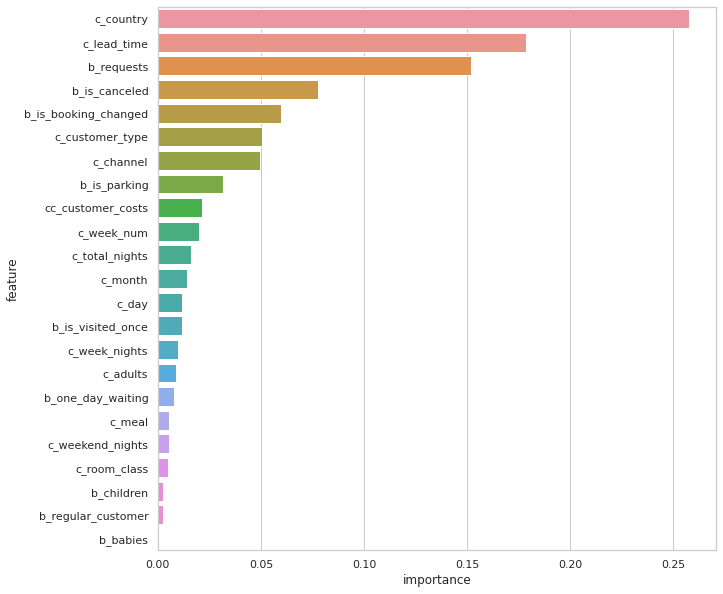

In [44]:
f, ax = plt.subplots(figsize=(10, 10))

sns.barplot(y=feature_importances['feature'], x=feature_importances['importance'], ax=ax)
print('Feature importances:')
plt.show()

In [45]:
top8_features = feature_importances.head(8)['feature']

top8_features

0               c_country
1             c_lead_time
2              b_requests
3           b_is_canceled
4    b_is_booking_changed
5         c_customer_type
6               c_channel
7            b_is_parking
Name: feature, dtype: object

In [46]:
bad_countries = list(
    ds.pivot_table(index='c_country', values='target',
                   aggfunc='mean').sort_values(by='target', ascending=False).head().reset_index()['c_country'])
bad_is_requests = bool(
    ds.pivot_table(index='b_requests', values='target',
                   aggfunc='mean').sort_values(by='target', ascending=False).reset_index().head(1)['b_requests'][0])
bad_is_canceled = bool(
    ds.pivot_table(index='b_is_canceled', values='target',
                   aggfunc='mean').sort_values(by='target', ascending=False).reset_index().head(1)['b_is_canceled'][0])
bad_lead_time = list(
    ds.pivot_table(index='c_lead_time', values='target',
                   aggfunc='mean').sort_values(by='target', ascending=False).reset_index().head(7)['c_lead_time'].astype('str'))
bad_customer_type = list(
    ds.pivot_table(index='c_customer_type', values='target',
                   aggfunc='mean').sort_values(by='target', ascending=False).reset_index().head(2)['c_customer_type'])
bad_is_booking_changed = bool(
    ds.pivot_table(index='b_is_booking_changed', values='target',
                   aggfunc='mean').sort_values(by='target', ascending=False).reset_index().head(1)['b_is_booking_changed'][0])
bad_is_parking = bool(
    ds.pivot_table(index='b_is_parking', values='target',
                   aggfunc='mean').sort_values(by='target', ascending=False).reset_index().head(1)['b_is_parking'][0])
bad_channel = list(ds.pivot_table(index='c_channel', values='target',
                                  aggfunc='mean').sort_values(by='target', ascending=False).reset_index().head(1)['c_channel'])


bad_clients = pd.DataFrame(
    {
        'Country': [bad_countries],
        'Is requests': [bad_is_requests],
        'Is canceled': [bad_is_canceled],
        'Lead time category': [bad_lead_time],
        'Customer type': [bad_customer_type],
        'Is booking changed': [bad_is_booking_changed],
        'Channel': bad_channel,
        'Is parking': [bad_is_parking],
    }
).T.rename(columns={0: 'Values of "untrusted" clients'})

print('Portrait of "unreliable" clients:')
print()
bad_clients

Portrait of "unreliable" clients:



,"Values of ""untrusted"" clients"
Country,"[PRT, CHN, BRA, RUS, ITA]"
Is requests,False
Is canceled,True
Lead time category,"[(246.0, 374.0], (176.0, 246.0], (132.0, 176.0], (96.0, 132.0], (68.0, ..."
Customer type,"[Transient, Contract]"
Is booking changed,False
Channel,TA/TO
Is parking,False


## Вывод

В данной работе была разработа ML-модель для опредения отказа от брони и внесения депозита.

Экономический тестовой выборке экономический представлен в таблице ниже.

In [47]:
res_table

,performance,performance with ML model,"economical effect, %"
revenue,50623050.00,75934575.00,50.00
costs,18041560.00,13508664.00,-25.12
profit,32581490.00,62425911.00,91.60
marginality,64.36,82.21,27.73


Можно увидеть значительный прирос финансовых показателей, который обосновывает разарботку и внедрение модели в продуктив.

Помимо этого, был составлен портрет "ненадежного" клиента, который предствлен в таблице ниже.

In [48]:
bad_clients

,"Values of ""untrusted"" clients"
Country,"[PRT, CHN, BRA, RUS, ITA]"
Is requests,False
Is canceled,True
Lead time category,"[(246.0, 374.0], (176.0, 246.0], (132.0, 176.0], (96.0, 132.0], (68.0, ..."
Customer type,"[Transient, Contract]"
Is booking changed,False
Channel,TA/TO
Is parking,False


Можно сказать, что наиболее "ненадежным" клиентом является посетитель:
- Из Потругалии;
- Не заказавший дополнительных услуг;
- Ранее отменявший заказ;
- Заказывающий номер за достаточно длительное время;
- Оформляющийся как клиент с типом "транзит" или "контранкт";
- Не меняющий параметров заказа;
- Заказавший по каналу "TA/TO";
- Не заказавший парковку.

Таким образом цель данной работы является выполненной.